In [1]:
__nbid__ = '0020'
__author__ = 'Michael Balogh <mbalogh@uwaterloo.ca>, Alice Jacques <alice.jacques@noirlab.edu>, Robert Nikutta <robert.nikutta@noirlab.edu>, David Herrera <david.herrera@noirlab.edu>'
__version__ = '20260102' # yyymmdd
__datasets__ = ['gogreen_dr2']
__keywords__ = ['gemini llp','tap','cluster','photometry','redshift','file service','spectra','catalogues']

# Acceso a datos de GOGREEN Data Release 2 en Astro Data Lab

*Autores: Michael Balogh (GOGREEN), Alice Jacques (NOIRLab Astro Data Lab), Robert Nikutta (NOIRLab Astro Data Lab)*

#### (_Traducción de [1_GOGREENDr2DataAccessAtDataLab.ipynb](https://github.com/astro-datalab/notebooks-latest/blob/master/03_ScienceExamples/GOGREEN_GalaxiesInRichEnvironments/1_GOGREENDr2DataAccessAtDataLab.ipynb)_)

Este notebook es una adaptación de la versión original producida por el equipo del survey GOGREEN. El original se encuentra en `Scripts/DR2_Notebook.ipynb`.

Mientras que el notebook original depende de acceso local a los archivos de datos y catálogos, este notebook modificado para Data Lab carga los catálogos a través de un servicio TAP (usando consultas SQL simples), y accede a todos los archivos necesarios (archivos FITS con espectros 1-d y 2-d, imágenes, etc.) a través del servicio de archivos de Data Lab para GOGREEN DR2.

**Note:** Astro Data Lab también aloja GOGREEN DR1. Sin embargo, GOGREEN DR2 reemplaza la versión DR1 y debe usarse para todos los casos científicos.

# Tabla de contenido
* [Avisos legales y atribuciones](#attribution)
* [Importaciones y configuración](#imports)
* [Autenticación](#auth)
* [Introducción a Jupyter y Pandas](#primer)
* [Acceso a archivos en Data Lab](#fileaccess)
* [Lectura de catálogos desde TAP](#tap)
* [Combinando tablas](#merge)
* [Gráficas](#plots)
  * [Dispersión de velocidades vs corrimiento al rojo, masa dinámica vs corrimiento al rojo](#plots-velocity)
  * [Colores UVJ con membresía](#plots-colors)
  * [Comparar corrimientos al rojo espectroscópicos y fotométricos](#plots-compare-redshifts)
  * [Éxito en el corrimiento al rojo](#plots-redshift-success)
  * [Distribución de masa estelar y corrimiento al rojo](#plots-mstar-zdistro)
  * [Gráficas de completitud](#plots-completeness)
  * [Espectro](#plots-spectrum)
  * [Éxito en el corrimiento al rojo como función de la SNR espectral](#plots-redshift-success-vs-snr)
  * [Éxito en el corrimiento al rojo Parte II](#plots-redshift-success-2)
  * [S/N como función de la magnitud para diferentes poblaciones de galaxias](#plots-snr-vs-mag)
  * [Gráficar resumen de los datos de objetos](#plots-summary-object)

<a class="anchor" id="attribution"></a>
# Avisos Legales y atribuciones

Avisos Legales
-----------
Tome en cuenta que usar el Astro Data Lab constituye un acuerdo con nuestros [Avisos Legales](https://datalab.noirlab.edu/disclaimers.php) mínimos.

Reconocimientos
---------------
Si ud. usa el **Astro Data Lab** en sus publicaciones de investigación, por favor incluya el siguiente texto en la sección de Reconocimientos de su publicaciones:

_Esta investigación utiliza servicios de datos proveeidos por el Astro Data Lab, el cual es parte del Programa "Community Science and Data Center" (CSDC) (Centro de Ciencia Comunitaria y Datos) del NSF NOIRLab. NOIRLab es operado por la "Association of Universities for Research in Astronomy (AURA), Inc."(Asociación de Universidaddes para la Investigación en Astronomía, Inc.), bajo un acuerdo de cooperación con la "U.S. National Science Foundation" (Fundación Nacional de Ciencia de los EE. UU.)._

Si utiliza **SPARCL junto con la plataforma de Astro Data Lab** (por medio de JupyterLab, línea de comando o interfaz de la web) en su publicación de investigación, por favor incluya el siguiente texto en la sección de Reconocimientos de su publicaciones:

_Esta investigación utiliza servicios o datos proporcionados por el "SPectra Analysis and Retrievable Catalog Lab" (SPARCL) (Laboratorio de Análisis y Catálogo Recuperable de Espectros) y el Astro Data Lab, ambos pertenecientes al Programa "Community Science and Data Center" (CSDC) (Centro de Ciencia Comunitaria y Datos) de NSF NOIRLab. NOIRLab es operado por la "Association of Universities for Research in Astronomy (AURA), Inc." (Asociación de Universidades para la Investigación en Astronomía, Inc.), bajo un acuerdo de cooperación con la "U.S. National Science Foundation" (Fundación Nacional de Ciencia de los EE. UU.)._

En cualquiera de los casos, **por favor cite las siguientes publicaciones**:

* Publicación del concepto de Data Lab: Fitzpatrick et al., "The NOAO Data Laboratory: a conceptual overview", SPIE, 9149, 2014, https://doi.org/10.1117/12.2057445

* Descripción general del Astro Data Lab: Nikutta et al., "Data Lab - A Community Science Platform", Astronomy and Computing, 33, 2020, https://doi.org/10.1016/j.ascom.2020.100411.

Si hace referencia al Jupyterlab / Jupyter notebooks de Data Lab, cite:

* Juneau et al., "Jupyter-Enabled Astrophysical Analysis Using Data-Proximate Computing Platforms", CiSE, 23, 15, 2021, https://doi.org/10.1109/MCSE.2021.3057097.

Si publica en una revista de la AAS, agregue también la palabra clave `\facility{Astro Data Lab}`

Y si está usando SPARCL, por vor agregue también `\software{SPARCL}` y cite:

* Juneau et al., "SPARCL: SPectra Analysis and Retrievable Catalog Lab", Conference Proceedings for ADASS XXXIII, 2024
https://doi.org/10.48550/arXiv.2401.05576.

La biblioteca de NOIRLab mantiene [listas de reconocimientos apropiados](https://noirlab.edu/science/about/scientific-acknowledgments) para usar cuando se hacen publicaciones utilizando los recursos, servicios o datos del Laboratorio.

---- **Versión en Inglés** ----


# Disclaimer & attribution

Disclaimers
-----------
Note that using the Astro Data Lab constitutes your agreement with our minimal [Disclaimers](https://datalab.noirlab.edu/disclaimers.php).

Acknowledgments
---------------
If you use **Astro Data Lab** in your published research, please include the text in your paper's Acknowledgments section:

_This research uses services or data provided by the Astro Data Lab, which is part of the Community Science and Data Center (CSDC) Program of NSF NOIRLab. NOIRLab is operated by the Association of Universities for Research in Astronomy (AURA), Inc. under a cooperative agreement with the U.S. National Science Foundation._

If you use **SPARCL jointly with the Astro Data Lab platform** (via JupyterLab, command-line, or web interface) in your published research, please include this text below in your paper's Acknowledgments section:

_This research uses services or data provided by the SPectra Analysis and Retrievable Catalog Lab (SPARCL) and the Astro Data Lab, which are both part of the Community Science and Data Center (CSDC) Program of NSF NOIRLab. NOIRLab is operated by the Association of Universities for Research in Astronomy (AURA), Inc. under a cooperative agreement with the U.S. National Science Foundation._

In either case **please cite the following papers**:

* Data Lab concept paper: Fitzpatrick et al., "The NOAO Data Laboratory: a conceptual overview", SPIE, 9149, 2014, https://doi.org/10.1117/12.2057445

* Astro Data Lab overview: Nikutta et al., "Data Lab - A Community Science Platform", Astronomy and Computing, 33, 2020, https://doi.org/10.1016/j.ascom.2020.100411

If you are referring to the Data Lab JupyterLab / Jupyter Notebooks, cite:

* Juneau et al., "Jupyter-Enabled Astrophysical Analysis Using Data-Proximate Computing Platforms", CiSE, 23, 15, 2021, https://doi.org/10.1109/MCSE.2021.3057097

If publishing in a AAS journal, also add the keyword: `\facility{Astro Data Lab}`

And if you are using SPARCL, please also add `\software{SPARCL}` and cite:

* Juneau et al., "SPARCL: SPectra Analysis and Retrievable Catalog Lab", Conference Proceedings for ADASS XXXIII, 2024
https://doi.org/10.48550/arXiv.2401.05576

The NOIRLab Library maintains [lists of proper acknowledgments](https://noirlab.edu/science/about/scientific-acknowledgments) to use when publishing papers using the Lab's facilities, data, or services.

<a class="anchor" id="imports"></a>
# Importaciones y configuración

In [1]:
# Librerías estándar
from getpass import getpass
from io import BytesIO
import gzip

# De 3ros
import numpy as np
np.seterr(divide='ignore',invalid='ignore')

import pandas as pd
pd.set_option('display.max_columns', 500) # Conveniente 

import matplotlib.pyplot as plt
import matplotlib.ticker as plticker

from astropy.io import fits, ascii
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3) # Define cosmología

# De Data Lab
from dl import queryClient as qc, storeClient as sc

<a class="anchor" id="auth"></a>
# Autenticación
Se puede acceder a gran parte de la funcionalidad de Data Lab sin iniciar sesión explícitamente (el servicio utiliza un inicio de sesión anónimo). Sin embargo, algunas funciones, como guardar los resultados de las consultas en el espacio de almacenamiento virtual, requieren iniciar sesión (es decir, necesitará una cuenta de usuario registrada).

Si necesita iniciar sesión en Data Lab, descomente la celda a continuación y ejecútela:

In [ ]:
#token = ac.login(input("Ingrese su nombre de usuario: (+ENTER) "),getpass("Ingrese su contraseña:: (+ENTER) "))
#ac.whoAmI()

<a class="anchor" id="primer"></a>
# Introducción a Jupyter y Pandas

**Breve introducción a ipython notebooks/jupyter**

Ver también: http://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/  
Video corto: https://www.youtube.com/watch?v=jZ952vChhuI  

Conceptos básicos de ejecución:  
   - Hay dos modos: modo comando y modo edición.  
       - Si has seleccionado una celda y ves un cursor, estás en modo edición (la celda estará resaltada en verde).  
       - Si la celda está resaltada en azul, estás en modo comando.  
       - Para alternar entre modos, presiona escape o haz clic en el margen de la celda.  

   -  **************** Ejecutar una celda, en cualquier modo: shift + enter ****************  
       - Nota que el número de celda cambiará. Jupyter no se fija en el orden de las celdas, sino en el orden en que las ejecutas. Presta atención a dónde has definido variables.  

   - El modo comando tiene algunos atajos de teclado:  
       - x - cortar. Esto también elimina si no recuerdas pegar. Hay un deshacer limitado en el menú Editar.  
       - c - copiar  
       - v - pegar  

   Mira la barra de herramientas para más opciones. Los atajos de teclado están listados en Ayuda > Atajos de teclado (atajo 'h').  

Consejos útiles:  
   Puedes consultar los requisitos de un paquete escribiendo (por ejemplo)  
   > help(np.arange)  
   o  
   > np.arange?   # esto abre una ventana emergente  

    También puedes usar la tecla tab para ver las opciones disponibles  
   > np.arange(<tab>  

También hay múltiples tipos de celdas. Esta celda es de tipo 'Raw NBConvert', que no es ejecutable.  
   - code (y) - ejecutable en python  
   - markdown (m) - renderiza en formato markdown, útil para títulos, tablas, ecuaciones  
   - raw NBConvert (r) - no ejecutable  
   - headings (1-6) - markdown con configuración rápida de encabezados  

   - puedes cambiar de tipo de celda accidentalmente mientras estás en modo comando. Puedes verificar el tipo de celda en el menú desplegable de la barra de herramientas.  




**Breve introducción a pandas:**  
Ver también: https://pandas.pydata.org/  

https://pandas.pydata.org/pandas-docs/stable/10min.html  

Pandas utiliza estructuras Series y DataFrame. Es muy parecido a astropy.table.Table, o a tablas de numpy, pero tiene un indexado conveniente que ayuda a evitar desalinear columnas/filas.  

Al recuperar elementos de una columna:  

    column = table['column_header']  
        (alternativamente, table.column_header, si column_header no es también una palabra clave)  
    esto es una Serie, que conserva el indexado del dataframe  

    
    para convertirlo en un array:  
    column = table['column_header'].values  

Para acceder a una fila y columna específica:  

    object = table.loc[row_index,'column_header']  

Para acceder a todos los índices en el dataframe:  

    indices = table.index  

Funciones convenientes:  

    table.query('column_header > 0')  
    devuelve un 'dataframe' recortado, manteniendo la estructura de índices del dataframe padre  

    equivalente a, pero más limpio que: table[table['column_header'] > 0]  

<a class="anchor" id="fileaccess"></a>
# Acceso a archivos de los productos de datos GOGREEN DR2 en Data Lab

Todos los productos de datos de GOGREEN DR2, en su forma original, residen en Data Lab en un servicio de archivos, o "VOSpace público". Para explorar el servicio de archivos y sus contenidos, se utiliza el `storeClient` de Data Lab (importado como `sc`):  

In [2]:
print(sc.services('gogreen_dr2'))


                    name   svc   description
                --------   ----  --------
             gogreen_dr2   vos   GOGREEN DR2 Survey



Para listar el contenido del directorio de nivel superior, se usa el método `storeClient.ls()`:

In [3]:
print(sc.ls('gogreen_dr2://',format='long'))

drwxrwxr-x  gogreen_dr2       0  13 May 2025 13:46  CATS/
-rw-rw-r-x  gogreen_dr2  239571  13 May 2025 13:46  GOGREEN_and_GCLASS_Data_Release_DR2.pdf
drwxrwxr-x  gogreen_dr2       0  13 May 2025 13:46  PHOTOMETRY/
-rw-rw-r-x  gogreen_dr2     520  13 May 2025 13:46  README
drwxrwxr-x  gogreen_dr2       0  13 May 2025 13:46  SPECTROSCOPY/
drwxrwxr-x  gogreen_dr2       0  13 May 2025 13:46  Scripts/



Para listar subdirectorios, simplemente se puede hacer:

In [4]:
print(sc.ls('gogreen_dr2://SPECTROSCOPY/OneD',format='long'))

-rw-rw-r-x  gogreen_dr2  2793600  13 May 2025 13:46  COSMOS-125_final.fits
-rw-rw-r-x  gogreen_dr2  3438720  13 May 2025 13:46  COSMOS-221_final.fits
-rw-rw-r-x  gogreen_dr2  2833920  13 May 2025 13:46  COSMOS-28_final.fits
-rw-rw-r-x  gogreen_dr2  1379520  13 May 2025 13:46  COSMOS-63_final.fits
-rw-rw-r-x  gogreen_dr2     174  13 May 2025 13:46  README
-rw-rw-r-x  gogreen_dr2  3720960  13 May 2025 13:46  SPT0205_final.fits
-rw-rw-r-x  gogreen_dr2  4728960  13 May 2025 13:46  SPT0546_final.fits
-rw-rw-r-x  gogreen_dr2  3358080  13 May 2025 13:46  SPT2106_final.fits
-rw-rw-r-x  gogreen_dr2  5011200  13 May 2025 13:46  SXDF49_final.fits
-rw-rw-r-x  gogreen_dr2  1137600  13 May 2025 13:46  SXDF64_final.fits
-rw-rw-r-x  gogreen_dr2  4245120  13 May 2025 13:46  SXDF76_final.fits
-rw-rw-r-x  gogreen_dr2  4783680  13 May 2025 13:46  SpARCS0034_final.fits
-rw-rw-r-x  gogreen_dr2  5451840  13 May 2025 13:46  SpARCS0035_final.fits
-rw-rw-r-x  gogreen_dr2  4262400  13 May 2025 13:46  SpARCS0036_

En el resto de este notebook, necesitaremos algunos directorios de forma repetida. Definámoslos por conveniencia:  

In [5]:
unaddir = 'gogreen_dr2://SPECTROSCOPY/OneD/'  # Espectros 1D
dosddir = 'gogreen_dr2://SPECTROSCOPY/TwoD/'  # Espectros 2D
imdir = 'gogreen_dr2://PHOTOMETRY/IMAGES/'    # Fotometría e imágenes


<a class="anchor" id="tap"></a>
# Leer tres tablas principales

El Data Release 1 de GOGREEN contiene tres catálogos principales:  

1. **clusters** – Contiene información sobre cada uno de los 26 cúmulos  
2. **redshift** – Es el catálogo de corrimientos al rojo, con una entrada por cada espectro  
3. **photo** – Es el catálogo fotométrico combinado  

Los tres catálogos están cargados en el servicio TAP de Data Lab como tablas consultables. Se puede interactuar con las tablas usando el `queryClient` de Data Lab (importado como `qc`). Aquí listamos algo de información sobre la base de datos (también llamada "esquema"):   

In [6]:
print(qc.schema('gogreen_dr2'))


Schema: gogreen_dr2

      Table Name   Description
      ----------   -----------
        clusters   Information relevant to each cluster in system in the GCLA
                   SS and GOGREEN surveys (26 rows)
           photo   Selected photometric data for each cluster system in the G
                   CLASS, GOGREEN samples, COMOS UltraVISTA, and SXDF SPLASH
                   fields (282,885 rows)
        redshift   Contains an entry for every unique object with a GOGREEN o
                   r GCLASS spectrum (2,771 rows)
x1p5__photo__allwise__source   gogreen_dr2.photo and xmatch_std.allwise__source crossmatc
                   h (1.5 arcsec)
x1p5__photo__gaia_dr3__gaia_source   gogreen_dr2.photo and xmatch_std.gaia_dr3__gaia_source cro
                   ssmatch (1.5 arcsec)
x1p5__photo__nsc_dr2__object   gogreen_dr2.photo and xmatch_std.nsc_dr2__object crossmatc
                   h (1.5 arcsec)
x1p5__photo__sdss_dr17__specobj   gogreen_dr2.photo and xmatch_std.sdss_dr17__

Más información sobre cada tabla:

In [7]:
for table in ('clusters','photo','redshift'):
    print(qc.schema('gogreen_dr2.%s' % table))


Schema: gogreen_dr2
 Table: clusters

     Column Name   Description
     -----------   -----------
          pa_deg   Position angle, in degrees, for the GMOS spectroscopic obs
                   ervations (GOGREEN only).
        redshift   Best estimate of the cluster redshift, based on available 
                   spectroscopy, including publicly available spectra from ot
                   her sources not included in this release.
            elat   Ecliptic latitude
            elon   Ecliptic longitude
            glat   Galactic latitude
            glon   Galactic longitude
      cluster_id   An integer which is used to identify the corresponding pho
                   tometry. It is a unique number for each SpARCS and SPT clu
                   ster; it is 14 for all COSMOS clusters and 13 for those in
                   the SXDF.
            htm9   HTM index (order 9 => ~10 arcmin size)
        nest4096   HEALPIX index (Nsides 4096, Nest scheme => ~52 arcsec size)
         

Cada tabla puede ser consultada usando SQL (versión Postgres) o ADQL.  
Para los fines de este notebook consultaremos y cargaremos las tablas completas.

Primero, la tabla `clusters`:  

(El método `query` de Data Lab queryClient puede convertir el resultado de la consulta a varios formatos en el momento,  
por ejemplo, a un DataFrame de Pandas)

In [8]:
cluster_table = qc.query('select * from gogreen_dr2.clusters',fmt='pandas')
print("Nombres de columnas:", cluster_table.columns)
cluster_table.head(10)  # Primeras 10 filas de la tabla

Nombres de columnas: Index(['pa_deg', 'redshift', 'elat', 'elon', 'glat', 'glon', 'cluster_id',
       'htm9', 'nest4096', 'ring256', 'dec_best', 'ra_best', 'ra_gmos',
       'dec_gmos', 'random_id', 'vdisp', 'vdisp_err', 'cluster', 'fullname',
       'gclass_m1', 'gclass_m2', 'gclass_m3', 'gclass_m4', 'gclass_m5',
       'gogreen_m1', 'gogreen_m2', 'gogreen_m3', 'gogreen_m4', 'gogreen_m5',
       'gogreen_m6', 'image_b', 'image_g', 'image_i', 'image_irac1', 'image_j',
       'image_j1', 'image_k', 'image_r', 'image_u', 'image_v', 'image_y',
       'image_z', 'kphot_cat', 'photoz_cat', 'preimage', 'stelmass_cat'],
      dtype='object')


,pa_deg,redshift,elat,elon,glat,glon,cluster_id,htm9,nest4096,ring256,dec_best,ra_best,ra_gmos,dec_gmos,random_id,vdisp,vdisp_err,cluster,fullname,gclass_m1,gclass_m2,gclass_m3,gclass_m4,gclass_m5,gogreen_m1,gogreen_m2,gogreen_m3,gogreen_m4,gogreen_m5,gogreen_m6,image_b,image_g,image_i,image_irac1,image_j,image_j1,image_k,image_r,image_u,image_v,image_y,image_z,kphot_cat,photoz_cat,preimage,stelmass_cat
0,0.0,1.156,73.719807,209.004945,43.629341,85.567791,10,3515738,41608482,67843,55.753400,244.17220,244.17180,55.757137,51.660860,782.0,39,SpARCS1616,SpARCS J1616+5545,GN2009AQ001-01,GN2009AQ001-02,GN2009AQ001-03,GN2010AQ00-06,GN2010AQ001-07,GN2016ALP004-06,GN2016ALP004-07,GN2017ALP004-09,GN2018ALP004-08,NaN,NaN,NaN,mos_Suprimeg_3,mos_Suprimei_3,mos_IRAC1_3,mos_WIRCamJ_3,NaN,mos_WIRCamK_3,mos_Suprimer_3,mos_MegaCamu_3,NaN,mos_HSCy_3,mos_HSCz_3,SpARCS-1616_totalall_WIRCamK.cat,SpARCS-1616_totalall_Ks.zout,mfrgN20150514S0083_add,SpARCS-1616_totalall_Ks.fout
1,NaN,0.871,74.240027,205.192905,43.768608,87.179267,19,3517590,47205462,64207,56.825000,243.31100,NaN,NaN,88.079790,1350.0,100,SpARCS1613,SpARCS J1613+5649,GN2010AQ001-04,GN2010AQ001-05,GN2009AQ001-08,GN2009AQ001-09,GN2009AQ001-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mos_g,mos_i,mos_IRAC1,mos_J,NaN,mos_K,mos_r,mos_u,NaN,NaN,mos_z,SpARCS-1613_v2.0.cat,SpARCS-1613_v2.0.zout,NaN,SpARCS-1613_v2.0.fout
2,90.0,1.035,45.954763,136.219739,52.438823,148.513716,9,3784504,24868666,58449,58.300750,162.79675,162.80917,58.308537,37.877510,689.0,36,SpARCS1051,SpARCS J1051+5818,GN2010AQ001-07,GN2010BQ037-07,GN2010AQ001-01,GN2010AQ001-02,NaN,GN2016ALP004-03,GN2017ALP004-07,GN2017ALP004-08,GN2018ALP004-07,NaN,NaN,NaN,mos_Suprimeg_3,mos_Suprimei_3,mos_IRAC1_3,mos_WIRCamJ_3,NaN,mos_WIRCamK_3,mos_Suprimer_3,mos_MegaCamu_3,NaN,mos_HSCy_3,mos_HSCz_3,SpARCS-1051_totalall_WIRCamK.cat,SpARCS-1051_totalall_Ks.zout,mfrgN20150508S0100_add,SpARCS-1051_totalall_Ks.fout
3,90.0,1.385,44.812927,133.627443,50.796211,150.745802,8,3780883,24885045,58441,58.309190,158.70600,158.70600,58.309170,5.635609,250.0,28,SpARCS1034,SpARCS J1034+5818,NaN,NaN,NaN,NaN,NaN,GN2017BDD012-01,GN2018ALP004-04,GN2018ALP004-05,GN2018ALP004-06,GN2017ALP004-04,GN2017ALP004-05,NaN,mos_Suprimeg_3,mos_Suprimei_3,mos_IRAC1_3,mos_WIRCamJ_3,NaN,mos_WIRCamK_3,mos_Suprimer_3,NaN,NaN,mos_HSCy_3,mos_HSCz_3,SpARCS-1034_totalall_WIRCamK.cat,SpARCS-1034_totalall_Ks.zout,mfrgN20150328S0192_add,SpARCS-1034_totalall_Ks.fout
4,0.0,1.461,44.358819,133.711844,50.903693,151.451085,7,3784228,24884272,59816,57.890000,158.35650,158.35650,57.890000,13.064641,955.0,86,SpARCS1033,SpARCS J1033+5753,NaN,NaN,NaN,NaN,NaN,GN2017ALP004-02,GN2017ALP004-03,GN2018ALP004-01,GN2018ALP004-02,GN2018ALP004-03,GN2017ALP004-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SpARCS-1033_totalall_WIRCamK.cat,SpARCS-1033_totalall_Ks.zout,mfrgN20150329S0129_add,SpARCS-1033_totalall_Ks.fout
5,NaN,0.956,45.178412,136.116788,52.493514,149.790375,18,3784398,24867030,61214,57.687060,161.88930,NaN,NaN,42.756584,660.0,120,SpARCS1047,SpARCS J1047+5741,GN2010BQ037-04,GN2010BQ037-05,GN2010AQ001-03,GN2010BQ037-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mos_g,mos_i,mos_IRAC1,mos_J,NaN,mos_K,mos_r,mos_u,NaN,NaN,mos_z,SpARCS-1047_v2.0.cat,SpARCS-1047_v2.0.zout,NaN,SpARCS-1047_v2.0.fout
6,NaN,0.869,-43.232457,346.331768,-72.693584,311.813389,16,2329926,144951900,666896,-44.180500,9.18756,NaN,NaN,13.516704,750.0,90,SpARCS0036,SpARCS J0036-4410,GS2009BQ026-01,GS2009BQ026-02,GS2009BQ026-03,GS2009BQ026-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mos_g,mos_i,mos_IRAC1,mos_J,NaN,mos_K,mos_r,mos_u,NaN,NaN,mos_z,SpARCS-0036_v2.0.cat,SpARCS-0036_v2.0.zout,NaN,SpARCS-0036_v2.0.fout
7,NaN,0.867,-42.147761,346.668560,-73.640799,313.829696,15,2329966,145310242,660956,-43.131500,8.67512,NaN,NaN,21.515335,700.0,150,SpARCS0034,SpARCS J0034-4307,GS2009BQ026-05,GS2009BQ026-06,GS2009BQ026-07,GS2009BQ026-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mos_g,mos_i,mos_IRAC1,mos_J,NaN,mos_K,mos_r,mos_u,NaN,NaN,mos_z,SpARCS-0034_v2.0.cat,SpARCS-0034_v2.0.zo

Luego, la tabla `photo`:

In [9]:
phot_table = qc.query('select * from gogreen_dr2.photo',fmt='pandas')
print("Nombres de columnas:", phot_table.columns)
phot_table.head(10)  # Primeras 10 filas de la tabla

Nombres de columnas: Index(['ra', 'dec', 'elat', 'elon', 'glat', 'glon', 'ra_centre', 'dec_centre',
       'b_tot', 'cluster_z', 'eb_tot', 'efuv_tot', 'eg_tot', 'eh_tot',
       'ei_tot', 'eia484_tot', 'eia527_tot', 'eia624_tot', 'eia679_tot',
       'eia738_tot', 'eia767_tot', 'eib427_tot', 'eib464_tot', 'eib505_tot',
       'eib574_tot', 'eib709_tot', 'eib827_tot', 'eirac1_tot', 'eirac2_tot',
       'eirac3_tot', 'eirac4_tot', 'ej_tot', 'ek_tot', 'eks_tot',
       'emips24_tot', 'enuv_tot', 'er_tot', 'eu_tot', 'ev_tot', 'ey_tot',
       'ez_tot', 'fuv_tot', 'g_tot', 'h_tot', 'i_tot', 'ia484_tot',
       'ia527_tot', 'ia624_tot', 'ia679_tot', 'ia738_tot', 'ia767_tot',
       'ib427_tot', 'ib464_tot', 'ib505_tot', 'ib574_tot', 'ib709_tot',
       'ib827_tot', 'irac1_tot', 'irac2_tot', 'irac3_tot', 'irac4_tot',
       'j_tot', 'k_flag', 'k_tot', 'ks_tot', 'mips24_tot', 'mstellar',
       'nuv_tot', 'nuvminv', 'r_tot', 'redshift_quality', 'star', 'totmask',
       'u_tot', 'uminv', 'v_to

,ra,dec,elat,elon,glat,glon,ra_centre,dec_centre,b_tot,cluster_z,eb_tot,efuv_tot,eg_tot,eh_tot,ei_tot,eia484_tot,eia527_tot,eia624_tot,eia679_tot,eia738_tot,eia767_tot,eib427_tot,eib464_tot,eib505_tot,eib574_tot,eib709_tot,eib827_tot,eirac1_tot,eirac2_tot,eirac3_tot,eirac4_tot,ej_tot,ek_tot,eks_tot,emips24_tot,enuv_tot,er_tot,eu_tot,ev_tot,ey_tot,ez_tot,fuv_tot,g_tot,h_tot,i_tot,ia484_tot,ia527_tot,ia624_tot,ia679_tot,ia738_tot,ia767_tot,ib427_tot,ib464_tot,ib505_tot,ib574_tot,ib709_tot,ib827_tot,irac1_tot,irac2_tot,irac3_tot,irac4_tot,j_tot,k_flag,k_tot,ks_tot,mips24_tot,mstellar,nuv_tot,nuvminv,r_tot,redshift_quality,star,totmask,u_tot,uminv,v_tot,vdisp,vminj,y_tot,z_tot,zphot,zphot_l68,zphot_u68,zspec,zspec_gogreen,cphotid,htm9,nest4096,ring256,specid,random_id,cluster
0,244.312531,55.719582,73.741946,209.301363,43.562927,85.492476,244.1722,55.7534,NaN,1.156,NaN,NaN,0.085843,NaN,0.132667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.761443,0.352293,3.880793,1.233024,0.490534,NaN,0.723538,NaN,NaN,0.084729,0.109255,NaN,0.335570,0.118174,NaN,-0.050168,NaN,0.215166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.848401,0.464892,0.347833,0.128208,1.002250,0.0,NaN,1.524,NaN,4.897788e+08,NaN,6.913343,0.036790,NaN,0,NaN,-0.076925,2.358,NaN,782.0,1.114,0.675599,0.430332,0.8011,0.5726,1.0456,NaN,NaN,110006980,3515738,41603002,68582,-1,5.957752,SpARCS1616
1,244.311798,55.720600,73.742494,209.297962,43.563040,85.493984,244.1722,55.7534,NaN,1.156,NaN,NaN,0.953982,NaN,1.486726,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.026549,-1.907965,-19.079646,-6.591150,5.500885,NaN,8.338053,NaN,NaN,0.941593,1.090265,NaN,3.568142,1.300885,NaN,-0.978761,NaN,-1.040708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.359292,-0.012389,3.109735,2.316814,-3.939823,0.0,NaN,1.400,NaN,1.000000e-01,NaN,NaN,-0.991150,NaN,0,NaN,-0.582301,NaN,NaN,782.0,NaN,4.584071,-0.656637,NaN,NaN,NaN,NaN,NaN,110006942,3515738,41603002,68582,-1,29.849567,SpARCS1616
2,244.312027,55.718090,73.740596,209.303846,43.563614,85.490607,244.1722,55.7534,NaN,1.156,NaN,NaN,0.115540,NaN,0.189065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.267477,1.968681,20.833210,6.821361,0.732253,NaN,1.021854,NaN,NaN,0.120042,0.133546,NaN,0.451656,0.157555,NaN,0.066023,NaN,1.446501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.173059,11.315416,3.466200,0.352622,8.423916,0.0,NaN,13.002,NaN,1.023293e+10,NaN,4.771605,0.528183,NaN,0,NaN,-0.183063,1.867,NaN,782.0,0.692,5.506906,3.380670,1.1842,1.1021,1.2831,NaN,NaN,110007216,3515738,41603000,68582,-1,97.803345,SpARCS1616
3,244.311600,55.719009,73.741171,209.301148,43.563590,85.491918,244.1722,55.7534,NaN,1.156,NaN,NaN,0.116074,NaN,0.180894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.533280,2.999822,32.913623,10.472242,0.673829,NaN,0.978334,NaN,NaN,0.114566,0.138685,NaN,0.450727,0.158282,NaN,3.536473,NaN,39.867482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.982993,27.066232,2.354634,10.336572,108.185033,0.0,NaN,88.344,NaN,3.715352e+10,NaN,6.040870,12.546491,NaN,1,NaN,0.284908,2.308,NaN,782.0,0.846,81.560483,64.297187,0.5237,0.5041,0.5431,NaN,NaN,110006989,3515738,41603002,68582,-1,62.071686,SpARCS1616
4,244.310471,55.720356,73.741841,209.296395,43.563826,85.493947,244.1722,55.7534,NaN,1.156,NaN,NaN,0.283225,NaN,0.437711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-35.660544,-16.798525,-158.852183,-58.336898,1.611069,NaN,2.350396,NaN,NaN,0.279546,0.323685,NaN,1.051977,0.408285,NaN,0.014713,NaN,-0.018391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.902613,0.051495,38.294164,15.452289,-0.305294,0.0,NaN,1.589,NaN,1.000000e-01,NaN,NaN,0.213338,NaN,0,NaN,-0.117704,NaN,NaN,782.0,NaN,1.327845,0.102991,NaN,NaN,NaN,NaN,NaN,110006956,3515738,41603002,68582,-1,4.259322,SpARCS1616
5,244.308670,55.717907,73.739287,209.298928,43.565481,85.491090,244.1722,55.7534,NaN,1.156,NaN,NaN,0.271485,NaN,0.454825,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-13.891546,-6.751856,-70.370907,-23.453443,1.685320,NaN,2.376371,NaN,NaN,0.28911

Y finalmente, la tabla `redshift`:

In [10]:
redshift_table = qc.query('select * from gogreen_dr2.redshift',fmt='pandas')
print("Nombres de columnas:", redshift_table.columns)
redshift_table.head(10)  # Primeras 10 filas de la tabla

Nombres de columnas: Index(['elat', 'elon', 'glat', 'glon', 'htm9', 'nest4096', 'ring256', 'specid',
       'ra', 'dec', 'd4000', 'delta_bic', 'ed4000', 'eewhdelta', 'eewoii',
       'eewoii_model', 'ef_oii', 'esfr_oii', 'ewhdelta', 'ewoii',
       'ewoii_model', 'f_oii', 'member', 'member_clean', 'member_em',
       'random_id', 'redshift', 'sfr_oii', 'snr_8500_rms', 'snr_8500_var',
       'spec_flag', 'extver', 'objclass', 'redshift_quality', 'cluster'],
      dtype='object')


,elat,elon,glat,glon,htm9,nest4096,ring256,specid,ra,dec,d4000,delta_bic,ed4000,eewhdelta,eewoii,eewoii_model,ef_oii,esfr_oii,ewhdelta,ewoii,ewoii_model,f_oii,member,member_clean,member_em,random_id,redshift,sfr_oii,snr_8500_rms,snr_8500_var,spec_flag,extver,objclass,redshift_quality,cluster
0,73.749421,209.165057,43.579158,85.541236,3515738,41608461,67843,210040694,244.26736,55.748990,1.720697,1.034171,0.047523,1.389133,1.904719,0.739854,2.785355e-18,1.072115,2.542908,-0.300046,2.527415,9.666613e-18,0,0,0,67.482280,0.98500,3.720791,5.869843,9.916716,0,190,4,4,SpARCS1616
1,73.748050,209.165898,43.580135,85.539867,3515738,41608461,67843,210040682,244.26619,55.747765,1.151380,15.497870,0.090801,7.363172,10.874112,3.263182,4.744413e-18,1.097008,-0.801108,14.278197,13.661364,2.044749e-17,0,0,0,97.495830,0.98300,4.727888,2.256782,2.369318,0,189,4,3,SpARCS1616
2,73.721717,209.190558,43.597487,85.510907,3515738,41608451,67843,210050317,244.24700,55.722780,1.066279,NaN,0.036692,2.293924,NaN,NaN,NaN,NaN,4.683563,NaN,NaN,NaN,0,0,0,90.166660,0.69900,NaN,2.513325,5.068531,0,215,4,4,SpARCS1616
3,73.713954,209.171247,43.606951,85.510719,3515738,41608451,67843,110000882,244.23093,55.720005,NaN,-9.552340,NaN,NaN,NaN,10.516150,7.775570e-18,3.717828,NaN,NaN,20.818668,1.669888e-17,-1,-1,-1,33.702690,1.07237,7.984437,1.957332,2.271820,0,6,3,2,SpARCS1616
4,73.736071,209.143118,43.593585,85.537376,3515738,41608460,67843,210040592,244.24414,55.742275,1.148239,NaN,0.021180,1.192288,NaN,NaN,NaN,NaN,5.918586,NaN,NaN,NaN,0,0,0,67.919050,0.68000,NaN,3.886507,8.195844,0,183,4,4,SpARCS1616
5,73.739136,209.130828,43.593101,85.543704,3515738,41608460,67843,210040676,244.24269,55.746810,NaN,23.937819,NaN,NaN,NaN,4.982780,3.071787e-18,0.154257,NaN,NaN,20.913225,1.511801e-17,-1,-1,-1,18.708320,1.06300,0.759184,0.941039,1.153891,0,188,4,2,SpARCS1616
6,73.736584,209.127843,43.595662,85.542589,3515738,41608462,67843,110001392,244.23872,55.745320,1.735545,9.195878,0.070965,1.609948,2.339010,0.820255,1.513981e-18,0.631975,9.690684,1.801753,2.788579,5.747672e-18,1,1,1,38.752900,1.15890,2.399229,3.207777,8.056579,0,32,3,4,SpARCS1616
7,73.732744,209.137704,43.597173,85.536399,3515738,41608460,67843,210040570,244.23837,55.740593,1.784196,15.749046,0.050824,1.541471,1.908053,0.633235,1.817778e-18,0.524312,-1.467241,0.028526,2.634937,8.215124e-18,0,0,0,60.415005,0.90400,2.369534,5.426196,10.386764,0,180,4,4,SpARCS1616
8,73.728415,209.125001,43.602764,85.536908,3515738,41608459,67843,210040532,244.22865,55.739384,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,40.980717,0.43400,NaN,21.064764,29.702555,0,179,4,4,SpARCS1616
9,73.729491,209.108348,43.604608,85.543011,3515738,41608459,67843,210050618,244.22331,55.743110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,46.918520,0.33600,NaN,3.294369,10.653121,0,225,4,4,SpARCS1616


<a class="anchor" id="merge"></a>
# Fusión de tablas  

Ahora unimos las tablas `photo` y `redshift`, usando las columnas `specid` y `cluster`.  
Esto devolverá una tabla que contiene información fotométrica (si está disponible) para cada objeto en el catálogo de redshift.  

In [11]:
# De esta manera se evitan columnas duplicadas (es decir, no es necesario especificar sufijos)  
merge_col = ['specid']
cols_to_use = phot_table.columns.difference(redshift_table.columns).tolist() + merge_col
matched_table = pd.merge(redshift_table, phot_table[cols_to_use], how='left', \
                         left_on=['specid'], right_on=merge_col )
merge_col = ['cluster']

# Aquí se adjunta el sufijo _c para distinguir entre valores de galaxias (Redshift) y valores de cúmulos (Redshift_c)
matched_table = pd.merge(matched_table, cluster_table, how='left', \
                         left_on=['cluster'], right_on=merge_col, suffixes=['','_c'] )
print("Nombres de columnas:", matched_table.columns.values)
matched_table.head(20)  # mostrar las primeras 20 filas de la tabla resultante

Nombres de columnas: ['elat' 'elon' 'glat' 'glon' 'htm9' 'nest4096' 'ring256' 'specid' 'ra'
 'dec' 'd4000' 'delta_bic' 'ed4000' 'eewhdelta' 'eewoii' 'eewoii_model'
 'ef_oii' 'esfr_oii' 'ewhdelta' 'ewoii' 'ewoii_model' 'f_oii' 'member'
 'member_clean' 'member_em' 'random_id' 'redshift' 'sfr_oii'
 'snr_8500_rms' 'snr_8500_var' 'spec_flag' 'extver' 'objclass'
 'redshift_quality' 'cluster' 'b_tot' 'cluster_z' 'cphotid' 'dec_centre'
 'eb_tot' 'efuv_tot' 'eg_tot' 'eh_tot' 'ei_tot' 'eia484_tot' 'eia527_tot'
 'eia624_tot' 'eia679_tot' 'eia738_tot' 'eia767_tot' 'eib427_tot'
 'eib464_tot' 'eib505_tot' 'eib574_tot' 'eib709_tot' 'eib827_tot'
 'eirac1_tot' 'eirac2_tot' 'eirac3_tot' 'eirac4_tot' 'ej_tot' 'ek_tot'
 'eks_tot' 'emips24_tot' 'enuv_tot' 'er_tot' 'eu_tot' 'ev_tot' 'ey_tot'
 'ez_tot' 'fuv_tot' 'g_tot' 'h_tot' 'i_tot' 'ia484_tot' 'ia527_tot'
 'ia624_tot' 'ia679_tot' 'ia738_tot' 'ia767_tot' 'ib427_tot' 'ib464_tot'
 'ib505_tot' 'ib574_tot' 'ib709_tot' 'ib827_tot' 'irac1_tot' 'irac2_tot'
 'ira

,elat,elon,glat,glon,htm9,nest4096,ring256,specid,ra,dec,d4000,delta_bic,ed4000,eewhdelta,eewoii,eewoii_model,ef_oii,esfr_oii,ewhdelta,ewoii,ewoii_model,f_oii,member,member_clean,member_em,random_id,redshift,sfr_oii,snr_8500_rms,snr_8500_var,spec_flag,extver,objclass,redshift_quality,cluster,b_tot,cluster_z,cphotid,dec_centre,eb_tot,efuv_tot,eg_tot,eh_tot,ei_tot,eia484_tot,eia527_tot,eia624_tot,eia679_tot,eia738_tot,eia767_tot,eib427_tot,eib464_tot,eib505_tot,eib574_tot,eib709_tot,eib827_tot,eirac1_tot,eirac2_tot,eirac3_tot,eirac4_tot,ej_tot,ek_tot,eks_tot,emips24_tot,enuv_tot,er_tot,eu_tot,ev_tot,ey_tot,ez_tot,fuv_tot,g_tot,h_tot,i_tot,ia484_tot,ia527_tot,ia624_tot,ia679_tot,ia738_tot,ia767_tot,ib427_tot,ib464_tot,ib505_tot,ib574_tot,ib709_tot,ib827_tot,irac1_tot,irac2_tot,irac3_tot,irac4_tot,j_tot,k_flag,k_tot,ks_tot,mips24_tot,mstellar,nuv_tot,nuvminv,r_tot,ra_centre,star,totmask,u_tot,uminv,v_tot,vdisp,vminj,y_tot,z_tot,zphot,zphot_l68,zphot_u68,zspec,zspec_gogreen,pa_deg,redshift_c,elat_c,elon_c,glat_c,glon_c,cluster_id,htm9_c,nest4096_c,ring256_c,dec_best,ra_best,ra_gmos,dec_gmos,random_id_c,vdisp_c,vdisp_err,fullname,gclass_m1,gclass_m2,gclass_m3,gclass_m4,gclass_m5,gogreen_m1,gogreen_m2,gogreen_m3,gogreen_m4,gogreen_m5,gogreen_m6,image_b,image_g,image_i,image_irac1,image_j,image_j1,image_k,image_r,image_u,image_v,image_y,image_z,kphot_cat,photoz_cat,preimage,stelmass_cat
0,73.749421,209.165057,43.579158,85.541236,3515738,41608461,67843,210040694,244.26736,55.748990,1.720697,1.034171,0.047523,1.389133,1.904719,0.739854,2.785355e-18,1.072115,2.542908,-0.300046,2.527415,9.666613e-18,0,0,0,67.482280,0.98500,3.720791,5.869843,9.916716,0,190,4,4,SpARCS1616,NaN,1.156,110005451.0,55.7534,NaN,NaN,0.129839,NaN,0.218872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.153243,3.453729,13.633140,11.867324,0.740085,NaN,1.131458,NaN,NaN,0.140969,0.200324,NaN,0.367260,0.181775,NaN,0.810569,NaN,13.677656,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,149.341310,106.041716,68.063683,44.759361,69.247077,0.0,NaN,139.889,NaN,9.332543e+10,NaN,4.756246,4.616719,244.1722,0.0,NaN,-0.042662,1.894,NaN,782.0,1.198,39.871834,29.864923,1.0660,1.0356,1.1006,0.985,0.98500,0.0,1.156,73.719807,209.004945,43.629341,85.567791,10,3515738,41608482,67843,55.7534,244.1722,244.1718,55.757137,51.66086,782.0,39,SpARCS J1616+5545,GN2009AQ001-01,GN2009AQ001-02,GN2009AQ001-03,GN2010AQ00-06,GN2010AQ001-07,GN2016ALP004-06,GN2016ALP004-07,GN2017ALP004-09,GN2018ALP004-08,NaN,NaN,NaN,mos_Suprimeg_3,mos_Suprimei_3,mos_IRAC1_3,mos_WIRCamJ_3,NaN,mos_WIRCamK_3,mos_Suprimer_3,mos_MegaCamu_3,NaN,mos_HSCy_3,mos_HSCz_3,SpARCS-1616_totalall_WIRCamK.cat,SpARCS-1616_totalall_Ks.zout,mfrgN20150514S0083_add,SpARCS-1616_totalall_Ks.fout
1,73.748050,209.165898,43.580135,85.539867,3515738,41608461,67843,210040682,244.26619,55.747765,1.151380,15.497870,0.090801,7.363172,10.874112,3.263182,4.744413e-18,1.097008,-0.801108,14.278197,13.661364,2.044749e-17,0,0,0,97.495830,0.98300,4.727888,2.256782,2.369318,0,189,4,3,SpARCS1616,NaN,1.156,110005506.0,55.7534,NaN,NaN,0.141976,NaN,0.239331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.170125,3.531150,13.862958,12.098397,0.795066,NaN,1.237221,NaN,NaN,0.154146,0.223105,NaN,0.440126,0.214992,NaN,0.868083,NaN,4.922516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.140088,80.843253,61.341814,49.432042,22.123942,0.0,NaN,63.295,NaN,2.398833e+10,NaN,3.156301,2.164122,244.1722,0.0,NaN,0.168343,1.430,NaN,782.0,1.850,10.836837,8.135234,1.0465,0.9855,1.1165,0.983,0.98300,0.0,1.156,73.719807,209.004945,43.629341,85.567791,10,3515738,41608482,67843,55.7534,244.1722,244.1718,55.757137,51.66086,782.0,39,SpARCS J1616+5545,GN2009AQ001-01,GN2009AQ001-02,GN2009AQ001-03,GN2010AQ00-06,GN2010AQ001-07,GN2016ALP004-06,GN2016ALP004-07,GN2017ALP004-09,GN2018ALP004-08,NaN,NaN,NaN,mos_Suprimeg_3,mos_Suprimei_3,mos_IRAC1_3,mos_WIRCamJ_3,NaN,mos_WIRCamK_3,mos_Suprimer_3,mos_MegaCamu_3,NaN,mos_HSCy_3,mos_HSCz_3,SpARCS-1616_totalall_WIRCamK.cat,SpARCS-1616_totalall_

<a class="anchor" id="plots"></a>
# Gráficas de ejemplo

<a class="anchor" id="plots-velocity"></a>
## Dispersión de velocidades vs redshift, masa dinámica vs redshift  

Generar dos gráficas: corrimiento al rojo y masa dinámica como función del redshift para cada cúmulo en la muestra. Similar a la Figura 1 del artículo del DR.  

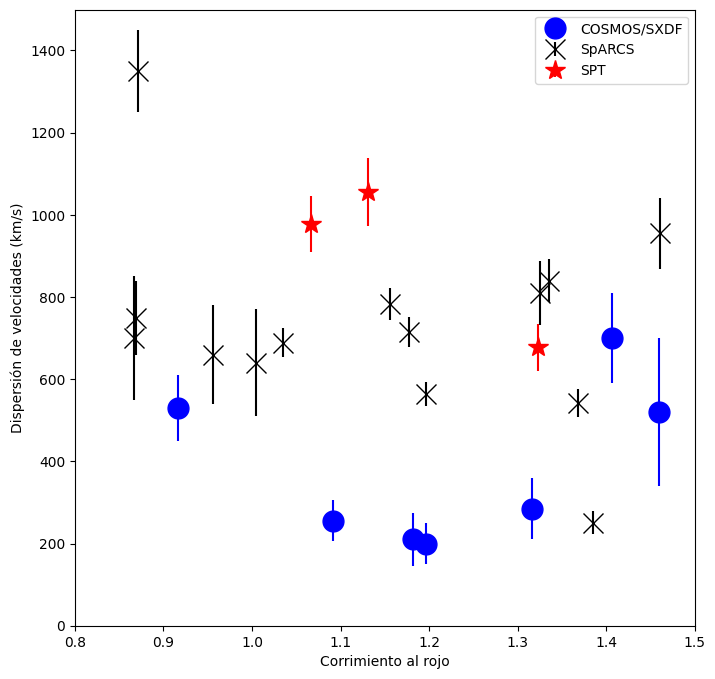

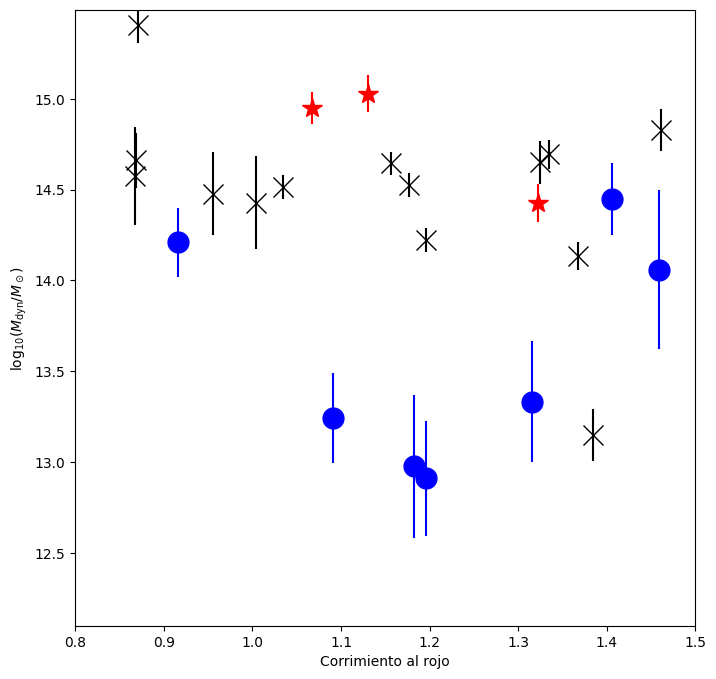

In [12]:
zred, sigma, sigma_err, cluster_id = cluster_table[['redshift','vdisp','vdisp_err','cluster_id']].values.T

groups = np.where( (cluster_id == 13) | (cluster_id == 14) )
sparcs = np.where( ((cluster_id>3) & (cluster_id<13)) | (cluster_id>14) )
spt = np.where( (cluster_id<=3) )

fig, ax = plt.subplots(figsize=(8,8))

ax.errorbar( zred[groups], sigma[groups], sigma_err[groups], fmt='o', ms=15, label='COSMOS/SXDF', c='b')
ax.errorbar( zred[sparcs], sigma[sparcs], sigma_err[sparcs], fmt='x', ms=15, label='SpARCS', c='k')
ax.errorbar( zred[spt], sigma[spt], sigma_err[spt], fmt='*', ms=15, label='SPT', c='r')
ax.legend()
ax.set_xlim(0.8,1.5)
ax.set_ylim(0,1499)
ax.set_ylabel('Dispersión de velocidades (km/s)')  
ax.set_xlabel('Corrimiento al rojo')  
fig.show()

(Saro_A,Saro_B,Saro_C) = (939,2.91,0.33)
hz = cosmo.H(zred)
h70 = hz.value / 100.
lSaro_Mass = 15. + Saro_B * np.log10( sigma / (Saro_A*h70**Saro_C) )
dM = Saro_B * sigma_err / sigma / (np.log(10))

fig, ax = plt.subplots(figsize=(8,8))
ax.errorbar(zred[groups], lSaro_Mass[groups], dM[groups], fmt='o', ms=15, label='COSMOS/SXDF', c='b')
ax.errorbar(zred[sparcs], lSaro_Mass[sparcs], dM[sparcs], fmt='x', ms=15, label='SpARCS', c='k')
ax.errorbar(zred[spt], lSaro_Mass[spt], dM[spt], fmt='*', ms=15, label='SPT', c='r')
ax.set_xlim(0.8,1.5)
ax.set_ylim(12.1,15.49)
ax.set_ylabel(r'log$_{10} (M_{\rm dyn}/M_\odot)$ ')
ax.set_xlabel('Corrimiento al rojo')
fig.show()

<a class="anchor" id="plots-colors"></a>
## Colores UVJ con membresía

Generar la Figura 2: diagrama UVJ que muestra miembros espectroscópicos y no miembros

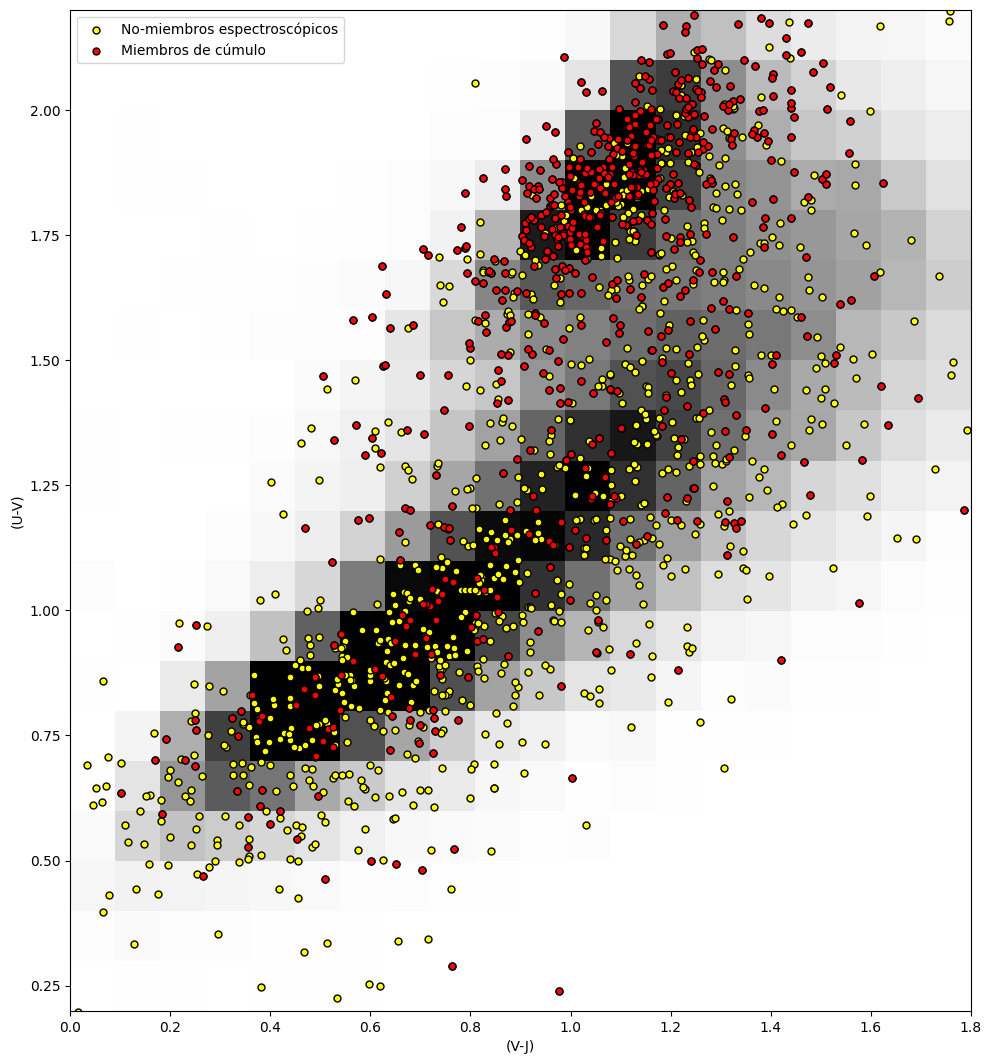

In [13]:
bin_range = ([0,1.8],[0.2,2.2])
cmap = 'gray_r'

# Usar el catálogo fotométrico completo
selection = '(zphot>0.8) & (zphot<1.5) & (mstellar>10**9.5) & (mstellar<10**12)'
UminV,VminJ,photz,mass = phot_table.query(selection)[['uminv','vminj','zphot','mstellar']].values.T
lmass = np.log10(mass)

selection = '(redshift_quality>2) & (redshift>=0.8) & (redshift<=1.5)'
UminVspec,VminJspec,mem = matched_table.query(selection)[['uminv','vminj','member']].values.T

# Mostrar en escala de grises todas las galaxias con masa estelar entre 9.5 y 12, y photo-z entre 0.8 y 1.5  
Nbins = 20
N,xedges,yedges = np.histogram2d( VminJ, UminV, bins=Nbins, range=bin_range)
N = N.T
xcenters = (xedges[:-1] + xedges[1:]) / 2
ycenters = (yedges[:-1] + yedges[1:]) / 2
X, Y = np.meshgrid(xedges, yedges)

fig,ax=plt.subplots(1,1,figsize=(13,13))

field = ax.imshow(N, interpolation='nearest', origin='lower',cmap=cmap,vmin=0,vmax=800,extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])

ax.scatter(VminJspec, UminVspec, c='yellow', edgecolor='k', alpha=1, s=25, label='No-miembros espectroscópicos')

ax.scatter(VminJspec[mem==1], UminVspec[mem==1], c='red', edgecolor='k', alpha=1, s=25, label='Miembros de cúmulo')

ax.legend()
ax.set_ylim(0.2,2.2)
ax.set_xlim(0,1.8)
ax.set_xlabel("(V-J)")
ax.set_ylabel("(U-V)")
fig.show()

<a class="anchor" id="plots-compare-redshifts"></a>
## Comparar corrimientos al rojo espectroscópicos y fotométricos  
Generar Figura 4: diferencia entre specz y photoz 

Fuera de rango: 0.2245
rms:  0.0566
Fuera de rango: 0.1322
rms:  0.0543
Fuera de rango: 0.0432
rms:  0.0445


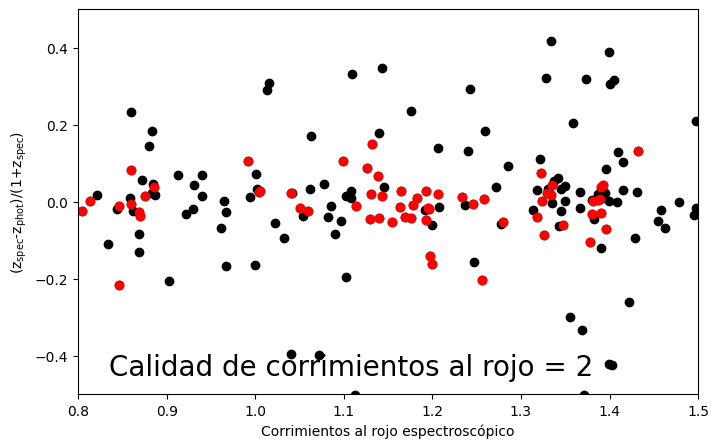

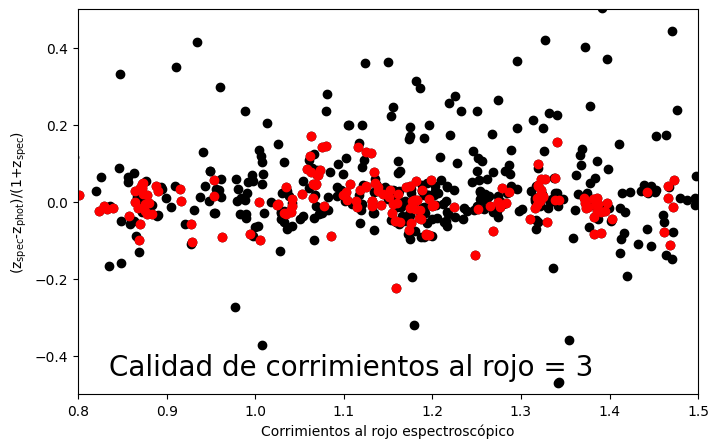

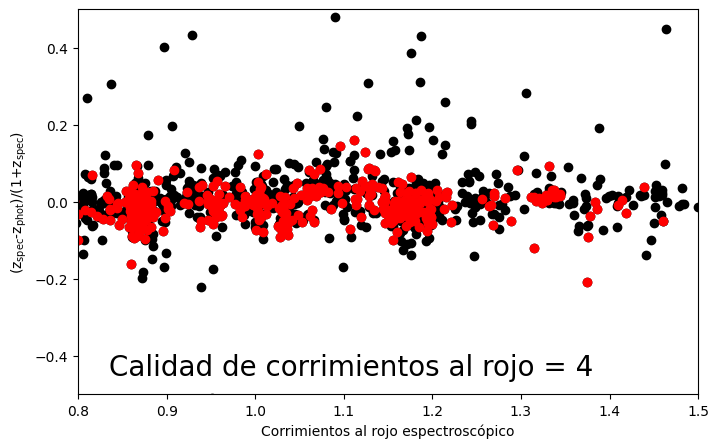

In [14]:
def zspeczphot(qflag1=3, qflag2=10):
    selection = '(zphot>0) & (redshift>=0.7) & (redshift<=1.5) & (redshift_quality>={}) & (redshift_quality<={})'.format(qflag1, qflag2)
    zspec, zphot, uminv, vminj = matched_table.query(selection)[['redshift','zphot','uminv','vminj']].values.T
    
    quiescent = np.where( (vminj<1.5) & (uminv>1.3) & (uminv>vminj*0.88+0.59))
    dz = (zspec-zphot)/(1.+zspec)
    outlier = np.where(np.abs(dz) > 0.15)
    good = np.where(np.abs(dz) <= 0.15)
    N = np.size(zspec)
    Noutlier = np.size(zspec[outlier])
    print ('Fuera de rango: {:.4f}'.format(Noutlier*1./N))  
    print ('rms:  {:.4f}'.format(np.std(dz[good])))  
    
    fig,ax = plt.subplots(figsize=(8,5))  
    ax.scatter(zspec, dz, c='k', marker='o')  
    ax.scatter(zspec[quiescent], dz[quiescent], c='r')  
    
    if (qflag1 == qflag2): label = 'Calidad de corrimientos al rojo = {}'.format(qflag1)  
    else: label = '{}<Calidad de corrimientos al rojo<{}'.format(qflag1,qflag2)  
    ax.text(0.05,0.05, label, transform=ax.transAxes, fontsize=20)  
    
    ax.set_xlim(0.8,1.5)  
    ax.set_ylim(-0.5,0.5)  
    ax.set_ylabel(r'(z$_{\rm spec}$-z$_{\rm phot}$)/(1+z$_{\rm spec}$)')  
    ax.set_xlabel('Corrimientos al rojo espectroscópico')  
    fig.show()
    
zspeczphot(qflag1=2, qflag2=2)
zspeczphot(qflag1=3, qflag2=3)
zspeczphot(qflag1=4, qflag2=4)

<a class="anchor" id="plots-redshift-success"></a>
## Éxito del corrimiento al rojo
Similar a la Figura 7 del artículo, mostrando la fracción de buenos corrimientos al rojo en función de la magnitud y del corrimiento al rojo fotométrico, para galaxias con S/N>1 a 8500Å.  
Nótese que el artículo usó S/N medido en 8600Å, por lo que es ligeramente diferente.  
Más adelante en este notebook calcularemos S/N en otras longitudes de onda y luego recrearemos exactamente la Figura 7.

(22.0, 24.25, 0.0, 1.0)

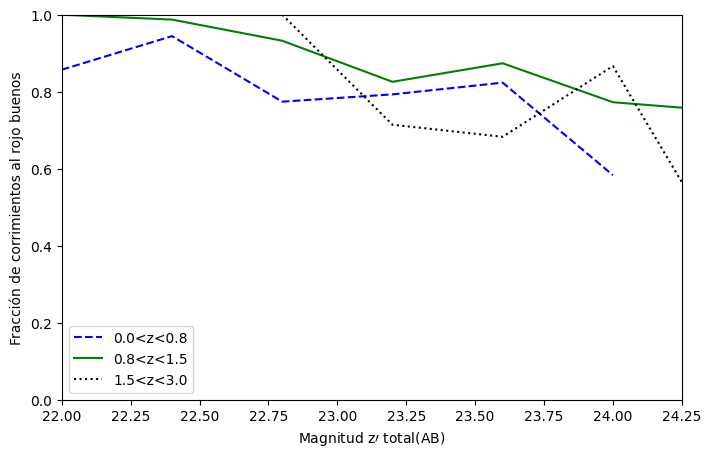

In [15]:
snrlim = 1.0
zp = np.array([(0,0.8),(0.8,1.5),(1.5,3)])
colours = np.array(['blue','green','k','red','magenta'])
lines = np.array(['dashed','solid','dotted'])
nbins = 10

gogreen_select = (matched_table['objclass']==1)  & (matched_table['snr_8500_var']>snrlim) & (matched_table['spec_flag']<2)
goodz = (matched_table['redshift_quality']>=3)
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
cindex = -1
mag = -2.5*np.log10(matched_table['z_tot'])+25
zphot = matched_table['zphot']
for (z1,z2) in zp:
    cindex = cindex+1
    zselect = (zphot>z1) & (zphot<=z2)
    zall,bins = np.histogram(mag[gogreen_select & zselect],bins=nbins,range=(21,25))
    zgood,bins = np.histogram(mag[gogreen_select & goodz & zselect],bins=nbins,range=(21,25))
    xmid = 0.5*(bins[1:]+bins[:-1])

    select = np.where(zall>5)
    plt.plot(xmid[select],zgood[select].astype('float')/zall[select],label=str(z1)+"<z<"+str(z2),c=colours[cindex],linestyle=lines[cindex])
    
plt.xlabel(r"Magnitud z$\prime$ total(AB)")
plt.legend()
plt.ylabel("Fracción de corrimientos al rojo buenos")
ax.axis([22,24.25,0.,1.0])

<a class="anchor" id="plots-mstar-zdistro"></a>
## Distribución de masa estelar y corrimiento al rojo
Figura 9 en el artículo del data release

Text(0.5, 0, 'Corrimiento al rojo')

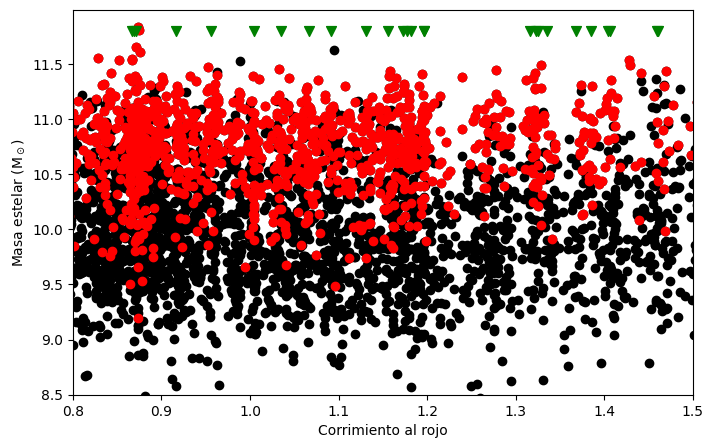

In [16]:
select = '(redshift_quality>{})'.format(2)
redshift,mass,UV,VJ=phot_table.query(select)[['zspec','mstellar','uminv','vminj']].values.T
lmass=np.log10(mass)
Quiescent=((VJ<1.5) & (UV>1.3) & (UV>VJ*0.88+0.59))
fig,ax=plt.subplots(figsize=(8,5))
ax.scatter(redshift,lmass,c='k',marker='o')
ax.scatter(redshift[Quiescent],lmass[Quiescent],c='r')
ax.set_xlim(0.8,1.5)
ax.set_ylim(8.5,11.99)
cm=cluster_table['redshift']*0+11.8
ax.scatter(cluster_table['redshift'],cm,marker='v',c='green',s=50)
ax.set_ylabel(r'Masa estelar (M$_\odot$)')
ax.set_xlabel('Corrimiento al rojo')

<a class="anchor" id="plots-completeness"></a>
## Gráficas de completitud
Figura 11 en el artículo del data release.

SpARCS1616 [1.156]
SpARCS1613 [0.871]
SpARCS1051 [1.035]
SpARCS1034 [1.385]
SpARCS1033 [1.461]
SpARCS1047 [0.956]
SpARCS0036 [0.869]
SpARCS0034 [0.867]
SpARCS0035 [1.335]
SXDF64 [0.916]
SXDF49 [1.091]
SpARCS0215 [1.004]
SpARCS0219 [1.325]
SXDF76b [1.182]
SXDF76 [1.459]
SXDF87 [1.406]
SpARCS0335 [1.368]
COSMOS-28 [1.316]
COSMOS-63 [1.1722]
COSMOS-125 [1.404]
COSMOS-221 [1.196]
SpARCS1634 [1.177]
SpARCS1638 [1.196]
SPT2106 [1.13066]
SPT0546 [1.0669]
SPT0205 [1.3227]


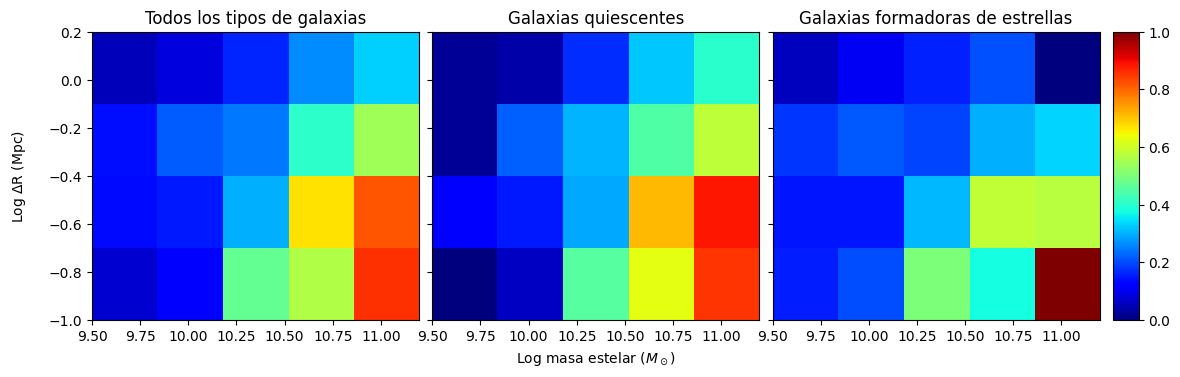

In [17]:
# Definir rango de masas estelares y log(dr_phys) a graficar
range=([9.5,11.2],[-1,0.2])
# Número de bins en cada dimensión
Nbins=(5,4)
photzrange=0.1
# Para ver un solo cúmulo por nombre
#clusters=np.array(['SpARCS1634'])
# Para ver un rango de cúmulos seleccionados por cluster_id
#selection = '(cluster_id>={}) & (cluster_id<{}) '.format(1,2)
#clusters=cluster_table.query(selection)['cluster']
# Para combinar todos los cúmulos:
clusters=None
cmap='jet'
cnt=0

phot_table['lmstellar']=np.log10(phot_table['mstellar'])
if clusters is None: clusters=cluster_table['cluster']
for cluster in clusters:
    cselection = '(cluster=="{}")'.format(cluster)
    cluster_z,cluster_RA,cluster_DEC=cluster_table.query(cselection)[['redshift','ra_best','dec_best']].values.T
    clusterpos=SkyCoord(ra=cluster_RA*u.deg,dec=cluster_DEC*u.deg,frame='icrs')
    print (cluster,cluster_z)
    cnt+=1
    # Esto no coincide con el artículo. Se necesitan l68 y u68.
    phot_table['dz_u']=phot_table['zphot_u68']-cluster_z
    phot_table['dz_l']=phot_table['zphot_l68']-cluster_z
    photselect='(lmstellar>{}) & (lmstellar<{}) & (dz_l<0) & (dz_u>0) & (star<{})'.format(range[0][0],range[0][1],1)
    specselect='(lmstellar>{}) & (lmstellar<{}) & (dz_l<0) & (dz_u>0) & (star<{}) & (redshift_quality>={})'.format(range[0][0],range[0][1],1,3)
    catpos=SkyCoord(ra=phot_table.query(photselect)['ra'].values.T*u.deg,dec=phot_table.query(photselect)['dec'].values.T*u.deg,frame='icrs') 
    UV=phot_table.query(photselect)['uminv'].values.T
    VJ=phot_table.query(photselect)['vminj'].values.T
    ZQ=phot_table.query(photselect)['redshift_quality'].values.T
    masses=phot_table.query(photselect)['lmstellar'].values.T

    dr=catpos.separation(clusterpos)
    DA=cosmo.angular_diameter_distance(cluster_z)
    dr_phys=dr.radian*DA
    dr_phys=np.log10(dr_phys.value+0.0001)

    withspec=(ZQ>=3)
    Quiescent=((VJ<1.5) & (UV>1.3) & (UV>VJ*0.88+0.59))
    # Bin por radio y masa estelar
    N,xedges,yedges=np.histogram2d(masses,dr_phys,bins=Nbins,range=range)
    Nq,xqedges,yqedges=np.histogram2d(masses[Quiescent],dr_phys[Quiescent],bins=Nbins,range=range)

    Ns,xedges,yedges=np.histogram2d(masses[withspec],dr_phys[withspec],bins=Nbins,range=range)
    Nqs,xqedges,yqedges=np.histogram2d(masses[withspec & Quiescent],dr_phys[withspec & Quiescent],bins=Nbins,range=range)

    # Seguramente hay una forma más elegante de hacer esto, pero no la conozco.
    if (cnt==1):
        Ntotal=N.T
        Nqtotal=Nq.T
        Nstotal=Ns.T
        Nqstotal=Nqs.T
    else:
        Ntotal+=N.T
        Nqtotal+=Nq.T
        Nstotal+=Ns.T
        Nqstotal+=Nqs.T
xcenters = (xedges[:-1] + xedges[1:]) / 2
ycenters = (yedges[:-1] + yedges[1:]) / 2
X, Y = np.meshgrid(xedges, yedges)
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(13,4),sharey=True,sharex=True)
cbax=fig.add_axes([0.91,0.16,0.02,0.72])
fig.subplots_adjust(wspace=0.04,bottom=0.16)
#print (Ntotal,Nstotal)
#print (Nqtotal,Nqstotal)
H=Nstotal/Ntotal
Hq=Nqstotal/Nqtotal
HSF=(Nstotal-Nqstotal)/(Ntotal-Nqtotal)
all=ax1.imshow(H, interpolation='nearest', origin='lower',cmap=cmap,vmin=0,vmax=1,extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
ax1.set_aspect('auto')
ax1.set_title('Todos los tipos de galaxias')
Q=ax2.imshow(Hq, interpolation='nearest', origin='lower',cmap=cmap,vmin=0,vmax=1,extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
ax2.set_aspect('auto')
ax2.set_title('Galaxias quiescentes')
SF=ax3.imshow(HSF, interpolation='nearest', origin='lower',cmap=cmap,vmin=0,vmax=1,extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
ax3.set_aspect('auto')
ax3.set_title('Galaxias formadoras de estrellas')
ax1.set_ylabel(r"Log $\Delta$R (Mpc)",labelpad=15)
ax2.set_xlabel(r"Log masa estelar ($M_\odot$)")
fig.colorbar(all,cax=cbax)
fig.set_tight_layout(False)
fig.show()

## Los siguientes scripts requieren acceso a más que solo los catálogos principales

<a class="anchor" id="plots-spectrum"></a>
## Graficar el espectro
Esto requiere acceso a los espectros unidimensionales en SPECTROSCOPY/OneD.

In [18]:
# Aquí voy a consultar el dataframe para encontrar un objeto, y eventualmente mostrar su espectro
obj = redshift_table.query('(cluster == "{}") & (extver == {})'.format('SpARCS0219', 1))
print(obj)

           elat       elon       glat        glon     htm9  nest4096  ring256  \
1484 -18.414048  30.713209 -59.880227  171.186434  2131209  72450808   431715   

         specid        ra       dec     d4000  delta_bic    ed4000  eewhdelta  \
1484  105000004  34.95679 -5.569709  0.944131   662.0875  0.063952   5.512757   

        eewoii  eewoii_model        ef_oii  esfr_oii  ewhdelta      ewoii  \
1484  9.852828      8.493174  1.925109e-17  2.382304  -2.70948  30.157173   

      ewoii_model         f_oii  member  member_clean  member_em  random_id  \
1484    60.574837  1.381500e-16       0             0          0  26.620033   

      redshift    sfr_oii  snr_8500_rms  snr_8500_var  spec_flag  extver  \
1484   1.21954  17.095936      1.096682      3.399572          0       1   

      objclass  redshift_quality     cluster  
1484         1                 3  SpARCS0219  


In [19]:
def get_wavelength_from_hdu(hdr):
    """
    get_wavelength_from_hdu(hdr)

    :param hdu: Encabezado de tabla Fits

    Lee 'CRVAL1' 'NAXIS1' y 'CD1_1' para calcular la cobertura en longitud de onda
    """
    return np.arange(hdr['CRVAL1'], hdr['CRVAL1']+hdr['NAXIS1']*hdr['CD1_1'], hdr['CD1_1'])

def get_spectrum(hdu, extver, units='fl', return_frame='observed', redshift=0., objclass=None, bounds=None):
    """
    get_spec(hdu, index, index_var, z=0., scale=1.e-15, bounds=None, units='Fl')

    :param hdu:       Objeto HDU de tabla Fits  
    :param index:     Extensión del marco científico  
    :param index_var: Extensión del marco de varianza  
    :param return_frame:  En qué marco devolver las longitudes de onda. Si es 'rest', se requiere un corrimiento al rojo.  
    :param redshift:  Corrimiento al rojo de la galaxia para convertir al marco reposo, si redshift = 0 devuelve el marco observado  
    :param units:     Unidades del espectro de salida, insensible a mayúsculas/minúsculas  

    :type units:      string, "Fl" o "Jy"  
    :returns:         longitudes de onda, el espectro y la varianza  

    Acceder al espectro desde un archivo fits, convertir a las unidades especificadas en el marco reposo  

    Nota: El espectro de entrada debe estar en unidades erg cm^-2 s^-1 Å^-1  
    Nota: Los valores del encabezado deben dar la longitud de onda en Ångstroms  
    """
    import astropy.units as u

    extver = int(extver)

    units = units.lower()
    assert units in ['fl','maggies','fnu'], 'Error, unidades deben ser "Fl" o "maggies"'
    return_frame = return_frame.lower()
    assert return_frame in ['rest','observed'], 'Error, return_frame debe ser o "rest" o "observed"'

    scale = hdu['SCI',extver].header['FLUXSCAL']
    spec = hdu['SCI',extver].data / scale
    var = hdu['VAR',extver].data / scale**2
    lam = get_wavelength_from_hdu(hdu['SCI',extver].header)

    if objclass==4:
        spec, var = fix_bad_gclass_spec(lam, spec, var, bounds, frame='observed', redshift=redshift)

    if return_frame == 'rest': # Convertir de longitud de onda observada a longitud de onda en reposo
        assert redshift >= 0, 'ERROR: el corrimiento al rojo debe ser positivo, es {}'.format(redshift)
        from astropy.cosmology import WMAP9 as cosmo

        dl = (cosmo.luminosity_distance(redshift).to(u.pc).value / 10.)**(-2)
        spec *= (1. + redshift) / dl
        var *= ((1. + redshift) / dl)**2
        lam /= (1. + redshift)

    if units == "maggies":
        convers = (3.34e4 * lam**2)/3631.
        spec *= convers
        var *= convers**2
    elif units == "fnu":
        convers = (3.34e4 * lam**2)
        spec *= convers
        var *= convers**2

    return lam, spec, var


In [20]:
# los dataframes suelen funcionar mejor cuando conoces su índice.
# Agrega '.index' al final para devolver una 'lista' de los índices que coinciden con tu consulta
obj = redshift_table.query('(cluster=="{}") & (specid == {})'.format('SpARCS0219', 105000004))
obj_index = obj.index.values[0] # toma el primer valor de índice

# Abre la tabla FITS y obtiene el espectro en el marco observado
# Este código está escrito con algunas opciones:
#       return_frame = observed o rest (necesita un corrimiento al rojo)
#       units = Fl o Maggies


#print(sc.ls('gogreen_dr2://SPECTROSCOPY/OneD',format='long'))

fits_path = unaddir + 'SpARCS0219_final.fits'

#with fits.open(fits_path) as hdu:
with fits.open(BytesIO(sc.get(fits_path))) as hdu:
    lam, spec, var = get_spectrum(hdu, redshift_table.loc[obj_index,'extver'], return_frame='observed') # get observed frame spectra


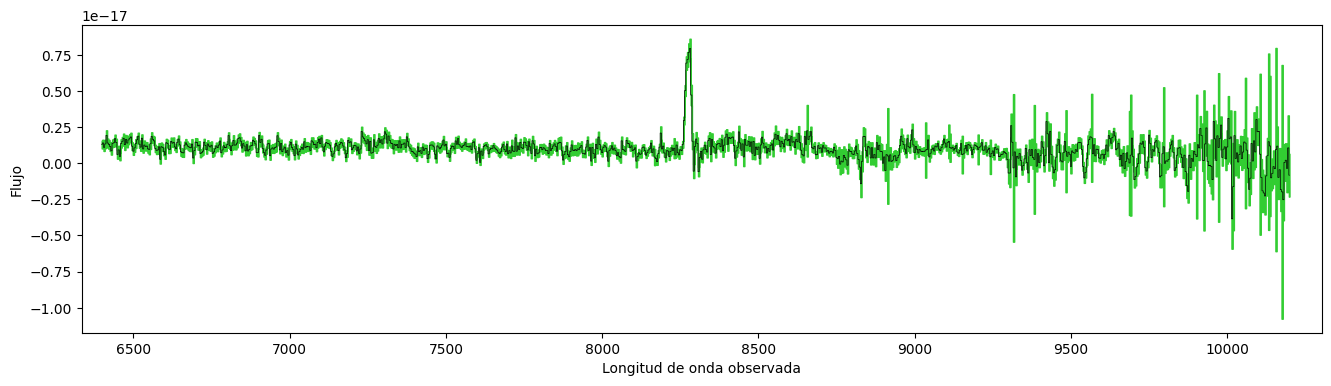

In [21]:
fig, ax = plt.subplots(1,1, figsize=(16,4))
ax.step(lam, spec, color='k', where='mid', lw=0.5)
ax.fill_between(lam, spec+np.sqrt(var), spec-np.sqrt(var), alpha=1, color='limegreen', step='mid')
ax.set(xlabel='Longitud de onda observada', ylabel='Flujo', yscale='linear', 
       xlim=[0.99*np.min(lam), np.max(lam)/0.99])
plt.show()

<a class="anchor" id="plots-redshift-success-vs-snr"></a>
## Éxito del corrimiento al rojo como función de la SNR espectral
Figura 6 en el artículo de Data Release. Requiere medir la S/N en diferentes longitudes de onda.
Primero, una rutina para calcular la S/N en diferentes longitudes de onda y guardarla en un archivo. Podemos tomar el ruido desde el arreglo VAR (SNR_VAR) o medir el RMS en el espectro en la longitud de onda de interés (SNR_RMS)

In [22]:
def recalcSNR(snr_central=np.arange(8000,9801,200),dwave=200):
    oldcluster = 'None'
    outfilename = 'SNR.txt'
    outfile = open(outfilename,"w+")
    outfile.write("#Cluster EXTVER SPECID ")
    for w in snr_central:
        outfile.write("SNR_"+str(w)+"_VAR SNR_"+str(w)+"_RMS ")
    outfile.write("\n")
    for i in np.arange(np.size(redshift_table['specid'])):
        if i % 500 == 0:
            print(i)
        cluster = redshift_table['cluster'][i]
        ext = redshift_table['extver'][i]
        specid = redshift_table['specid'][i]
        if cluster != oldcluster:
            try:
                MEF.close()
            except:
                pass
            oldcluster = cluster
            onedfile = unaddir + cluster + '_final.fits'
            MEF = fits.open(BytesIO(sc.get(onedfile)))  # Obtener bytes crudos del servicio de archivos vía sc.get()
            #MEF = fits.open(onedfile)
        signal = MEF['sci',ext].data
        variance = MEF['var',ext].data
        header = MEF['sci',ext].header
        crval1 = header['CRVAL1']
        crpix1 = header['CRPIX1']
        cd1_1 = header['CD1_1']
        outfile.write("%s %d %d " % (cluster,ext,specid))
        for w in snr_central:
            wave=np.array([w-dwave,w+dwave])
            pix=((wave-crval1)/cd1_1+crpix1).astype(int)
            snr_var=np.average(signal[pix[0]:pix[1]]/np.sqrt(variance[pix[0]:pix[1]]))        
            if ((np.std(signal[pix[0]:pix[1]]))>0):
                snr_rms=np.average(signal[pix[0]:pix[1]])/np.std(signal[pix[0]:pix[1]])
            else:
                snr_rms=0
            outfile.write("%f %f " % (snr_var,snr_rms))
        outfile.write("\n")
    outfile.close()

In [23]:
recalcSNR()

0
500
1000
1500
2000
2500


<a class="anchor" id="plots-redshift-success-2"></a>
## Éxito del corrimiento al rojo Parte II
Ahora podemos reproducir la Figura 7 del artículo, restringiendo a galaxias con S/N>1 en 9600 Å. 

(22.0, 24.25, 0.0, 1.0)

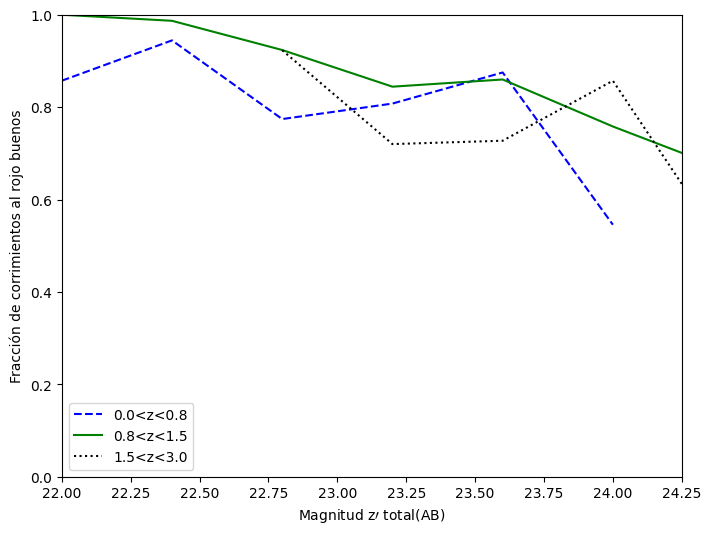

In [24]:
snrlim = 1.0
snrwave = 9600
zp = np.array([(0,0.8),(0.8,1.5),(1.5,3)])
colours = np.array(['blue','green','k','red','magenta'])
lines = np.array(['dashed','solid','dotted'])
nbins = 10

#snrfile=catdir+'SNR.txt'
snrfile = 'SNR.txt'
snrdata = ascii.read(snrfile)
snr_rms = snrdata['SNR_'+str(snrwave)+'_RMS']
snr_var = snrdata['SNR_'+str(snrwave)+'_VAR']
gogreen_select = (matched_table['objclass']==1)  & (snr_var>snrlim) & (matched_table['spec_flag']<2)
goodz = (matched_table['redshift_quality']>=3)
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
cindex = -1
mag = -2.5*np.log10(matched_table['z_tot'])+25
zphot = matched_table['zphot']
for (z1,z2) in zp:
    cindex = cindex+1
    zselect = (zphot>z1) & (zphot<=z2)
    zall,bins = np.histogram(mag[gogreen_select & zselect],bins=nbins,range=(21,25))
    zgood,bins = np.histogram(mag[gogreen_select & goodz & zselect],bins=nbins,range=(21,25))
    xmid = 0.5*(bins[1:]+bins[:-1])

    select = np.where(zall>5)
    plt.plot(xmid[select],zgood[select].astype('float')/zall[select],label=str(z1)+"<z<"+str(z2),c=colours[cindex],linestyle=lines[cindex])
    
plt.xlabel(r"Magnitud z$\prime$ total(AB)")
plt.legend()
plt.ylabel("Fracción de corrimientos al rojo buenos")
ax.axis([22,24.25,0.,1.0])

<a class="anchor" id="plots-snr-vs-mag"></a>
# S/N como función de la magnitud para diferentes poblaciones de galaxias
Figura 3 en el artículo del data release

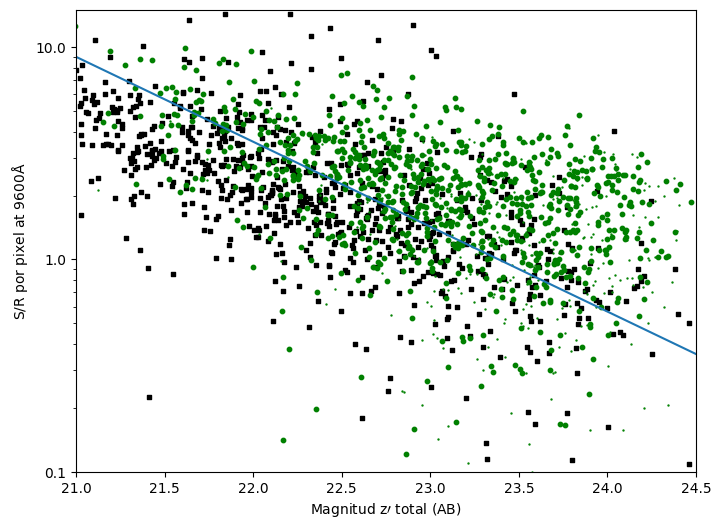

In [25]:
snrwave = 9600
snrfile = 'SNR.txt'
snrdata = ascii.read(snrfile)
snr_rms = snrdata['SNR_'+str(snrwave)+'_RMS']
snr_var = snrdata['SNR_'+str(snrwave)+'_VAR']
zmag = -2.5*np.log10(matched_table['z_tot'])+25
flags = matched_table['spec_flag']
gogreen_select = (matched_table['objclass']==1) 
gclass_select = (matched_table['objclass']==4)
goodz = (matched_table['redshift_quality']>=3)

fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(zmag[gclass_select & goodz],snr_rms[gclass_select & goodz],c='k',s=5,marker='s')
ax.scatter(zmag[gogreen_select],snr_rms[gogreen_select],c='g',marker='.',s=2)
ax.scatter(zmag[gogreen_select & goodz],snr_rms[gogreen_select & goodz],c='g',s=10)
snlim = (snr_rms>1.0)
x1 = zmag[goodz & snlim]
x2 = zmag[goodz]
m1 = 21
m2 = 24.5
ax.axis([m1,m2,0.1,15])
y1 = 9
y2 = (10.**(-(m2-m1)/2.5))*y1
plt.plot((m1,m2),(y1,y2))
ax.set_yscale('log')
ax.get_yaxis().set_major_formatter(plticker.ScalarFormatter())
plt.ylabel("S/R por pixel at "+str(int(snrwave))+r"$\mathrm{\AA}$")
plt.xlabel(r"Magnitud z$\prime$ total (AB)")
fig.show()

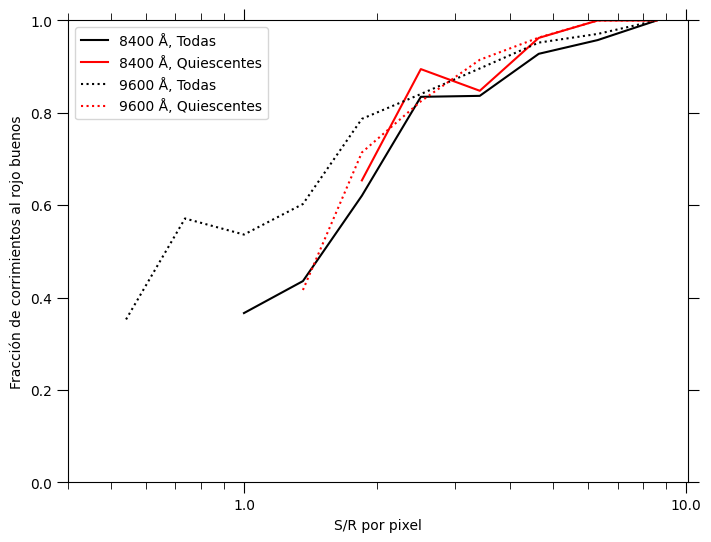

In [26]:
# Especifica un arreglo de longitudes de onda en las que quieres medir S/N. Deben corresponder a entradas en SNR.txt, generado arriba.
snrwave = np.array([8400,9600])
nbins = 15
colours = np.array(['k','red','blue','green'])
lines = np.array(['solid','dotted','dashed'])
snrfile = 'SNR.txt'
snrdata = ascii.read(snrfile)
flags = matched_table['spec_flag']
VJ = matched_table['vminj']
UV = matched_table['uminv']
Quiescent = (VJ<1.5) & (UV>1.3) & (UV>VJ*0.88+0.59)
zphot = matched_table['zphot']
gogreen_select = (matched_table['objclass']==1) & (flags<2) 
goodz = (matched_table['redshift_quality']>=3)  
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
cindex = -1
for snr in snrwave:
    cindex = cindex+1
    snr_var = snrdata['SNR_'+str(snr)+'_VAR']
    zall_var,bins = np.histogram(np.log10(snr_var[gogreen_select]),bins=nbins,range=(-1,1))
    zgood_var,bins = np.histogram(np.log10(snr_var[gogreen_select & goodz]),bins=nbins,range=(-1,1))
    xmid = 0.5*(bins[1:]+bins[:-1])
    ok = np.where(zall_var>10)
    plt.semilogx(10.**xmid[ok],zgood_var[ok].astype('float')/zall_var[ok],label="%d Å, Todas" % snr,c='k',linestyle=lines[cindex])
    zall_var,bins = np.histogram(np.log10(snr_var[gogreen_select & Quiescent]),bins=nbins,range=(-1,1))
    zgood_var,bins = np.histogram(np.log10(snr_var[gogreen_select & goodz & Quiescent]),bins=nbins,range=(-1,1))
    xmid = 0.5*(bins[1:]+bins[:-1])
    ok = np.where(zall_var>10)
    plt.semilogx(10.**xmid[ok],zgood_var[ok].astype('float')/zall_var[ok],label="%d Å, Quiescentes" % snr,c='red',linestyle=lines[cindex])
plt.xlabel(r"S/R por pixel")
plt.legend()
ax.get_xaxis().set_major_formatter(plticker.ScalarFormatter())
plt.ylabel("Fracción de corrimientos al rojo buenos")
plt.tick_params(which='major', length=8,top='on', bottom='on', left='on', right='on')
plt.tick_params(which='minor', length=5,top='on', bottom='on', left='on', right='on')
ax.axis([0.4,10.1,0.,1.0])
fig.show()

<a class="anchor" id="plots-summary-object"></a>
## Resumen gráfico de los datos del objeto

Aquí hay otro ejemplo de una rutina que graficará el espectro 1D y 2D, junto con la imagen en banda I y otra información, para un objeto dado. Para graficar la imagen necesita acceso al directorio PHOTOMETRY/IMAGES/, pero debería ejecutarse sin él (simplemente no obtendrás la imagen)

In [27]:
def markline(ax, name, wavelength, location, ll, y, y1, y2):
    # Añade una anotación con línea vertical y etiqueta
    doline = True
    assert location.lower() in ['below','above'], 'Error: "location" debe ser "below" o "above"'    
    try:
        range2 = np.where((ll>wavelength*0.995) & (ll<wavelength*1.005) & (y>0))
        s1 = np.min(y[range2])
        s2 = np.max(y[range2])
    except:
        doline = False
    if doline:
        gap = 0.25*(y2-y1)
        if location == 'below':
            textpos = s1-gap
        elif location == 'above':
            textpos = s2+gap
        ax.annotate(name, xy=(wavelength, s2), xytext=(wavelength,textpos), \
                    arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=0))

def plotspecinspect(table, obj_index,filter='I'):
    import matplotlib.patches as patches
    import matplotlib.transforms as transforms
    import matplotlib.ticker as plticker
    import matplotlib.gridspec as gridspec

    from astropy import wcs
    from astropy.convolution import convolve, Box1DKernel

    import os
    
    # Crear variables con nombres de archivos útiles
    cluster = table.loc[obj_index,'cluster']
    onedfile = unaddir + cluster + '_final.fits'
    twodfile = dosddir + cluster + '_twod.fits.gz'
    imname = table.loc[obj_index,'image_'+filter].rstrip()
    cdirname = cluster.replace('SPT','SPTCL-').replace('SpARCS','SpARCS-')
    image = imdir + cdirname + '/' + imname + '.fits'
    imageaccess=True
    
    if sc.stat(image) == {}:
        image = image + '.gz'
        
    if sc.stat(image) == {}:
        print ('No image file ',image)
        imageaccess=False
        
    # Obtener información clave para este objeto y asignarla a nombres de variables útiles
    # Para usar la posición del catálogo de espectros (la imagen puede no alinearse exactamente con la posición de la rendija sobrepuesta)
    #    cols = ['SPECID','EXTVER','Redshift','zphot','Redshift_Quality','RA(J2000)','DEC(J2000)','OBJClass','PA_deg','z_tot','SNR_8500_VAR']
    # Para usar posición del catálogo fotométrico
    cols = ['specid','extver','redshift','zphot','redshift_quality','ra','dec','objclass','pa_deg','z_tot','snr_8500_var']
    specid, ext, zspec, zphot, Quality, ra, dec, objclass, pa, z_tot, snr_target = table.loc[obj_index,cols].values.T
    radec = np.array([[ra,dec]])
    usephotoz = False # si la calidad de corrimiento al rojo es inferior a 3, usar el corrimiento al rojo fotométrico en su lugar
    
    zmag_target = -2.5 * np.log10(z_tot)+25
    
    if (Quality<3) & ~np.isnan(zphot): # Comprobar la calidad del corrimiento al rojo, si <3 usar phot (si existe)
        zred = zphot
        usephotoz = True
    else: 
        zred = zspec
    
    # Crear figura
    fig = plt.figure(constrained_layout=True, figsize=(4*4, 4*3))
    gs = gridspec.GridSpec(ncols=4, nrows=3, figure=fig, height_ratios=[1,1,0.8])
    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1])
    ax3 = fig.add_subplot(gs[0, 2:])
    ax4 = fig.add_subplot(gs[1, :])
    ax5 = fig.add_subplot(gs[2, :])
    
    ##############################
    # 1 - Panel de información
    info = '\n'.join([ 'SPECID = {}','ZMAG = {:.1f}','SNR = {:.2f}','OBJCLASS = {}','z = {:.3f}'])
    info = info.format(specid, zmag_target, snr_target, objclass, zred)
    if usephotoz: info += '\nUzing photz'
    else: info += '\nz_Q = {}'.format(Quality)
    
    ax1.axis('off')
    ax1.text(x=0, y=0, s=info, fontsize=20)
    
    
    ##############################
    # 2 - Franqueo postal de la preimagen
    if imageaccess:
        # Abrir archivo
        if image.endswith('.fits'):
            imagedat = fits.open(BytesIO(sc.get(image)))
        elif image.endswith('.fits.gz'):
            imagedat = fits.open(gzip.GzipFile(fileobj=BytesIO(sc.get(image))))
        
        try: 
            im = imagedat[1].data
            im_header = imagedat[1].header
        except:
            im = imagedat[0].data
            im_header = imagedat[0].header
            
        imagedat.close()
        
        # A partir de la escala de píxel, calcular la escala del CCD
        imagewcs = wcs.WCS(im_header)
        im_xscale = (np.abs(im_header['CD1_1'])+np.abs(im_header['CD1_2']))*3600
        im_yscale = (np.abs(im_header['CD2_1'])+np.abs(im_header['CD2_2']))*3600
        im = im-np.median(im)
        pixels = imagewcs.wcs_world2pix(radec,0)
        yccd, xccd = pixels[0][0], pixels[0][1]

        # Crear sello postal de la galaxia
        defstampsize = 5 / im_xscale * np.array([1,1])
        ximage = [int(np.max([xccd-defstampsize[0]/2+.5,0])),int(np.min([xccd+defstampsize[0]/2+.5,np.shape(im)[0]]))]
        yimage = [int(np.max([yccd-defstampsize[1]/2+.5,0])),int(np.min([yccd+defstampsize[1]/2+.5,np.shape(im)[1]]))]
        centralstampsize = 1 / im_xscale * np.array([1,1])
        xcent = [int(np.max([xccd-centralstampsize[0]/2+.5,0])),int(np.min([xccd+centralstampsize[0]/2+.5,np.shape(im)[0]]))]
        ycent = [int(np.max([yccd-centralstampsize[1]/2+.5,0])),int(np.min([yccd+centralstampsize[1]/2+.5,np.shape(im)[1]]))]
        xstamp = xccd-ximage[0]
        ystamp = yccd-yimage[0]

        ax2.axis('off')
        try:
            im_sub = im[ximage[0]:ximage[1],yimage[0]:yimage[1]]
            minval = np.nanmin(im_sub)
            maxval = np.nanmax(im[xcent[0]:xcent[1],ycent[0]:ycent[1]])
            ax2.imshow(im_sub, vmax=0.99*maxval, vmin=minval, cmap=plt.get_cmap('gray'))
        except:
            pass
        # Rectángulo: xy=(), ancho, alto
        rect = patches.Rectangle(
            (xstamp-1/2./im_xscale, ystamp-2.25/im_yscale),
            1/im_xscale,
            4.5/im_yscale,
            fill=False,
            edgecolor='red')
        obj = patches.Rectangle(
            (xstamp-1./2./im_xscale, ystamp-0.775/im_yscale),
            1/im_xscale,
            1.55/im_yscale,
            fill=False,
            edgecolor='yellow')
        t = transforms.Affine2D().rotate_deg_around(xstamp,ystamp,pa)
        rect.set_transform(t + ax2.transData)
        obj.set_transform(t + ax2.transData)
        ax2.add_patch(rect)
        ax2.add_patch(obj)
        ax2.scatter(xstamp,ystamp,marker = 'x')
        ax2.set_xlim(0,int(defstampsize[0]))
        ax2.set_ylim(0,int(defstampsize[1]))
    
    
    ##############################
    # 3 - SNR vs ZMAG
    ztots, snrs = matched_table.query('objclass==1')[['z_tot','snr_8500_var']].values.T
    zmags = -2.5*np.log10(ztots) + 25
    
    ax3.scatter(zmags, snrs, facecolor='none', edgecolor='k', s=50)
    ax3.scatter(zmag_target, snr_target, c='r', s=50)
    ax3.set_yscale('log')
    ax3.get_yaxis().set_major_formatter(plticker.ScalarFormatter())
    ax3.set_ylim(0.2,10)
    ax3.set_xlim(20,24.5)
    ax3.set_ylabel("S/N @ 850nm")
    ax3.set_xlabel("ZMAG")
    
    ##############################
    ##### 4 - Espectro 1D
    
    # Abrir archivo
    with fits.open(BytesIO(sc.get(onedfile))) as onedspec:  # Leyendo archivo desde el servicio de archivos
        mdf = onedspec['mdf',1].data
        spectrum = onedspec['sci',ext].data
        header_primary = onedspec[0].header
        
        hd = onedspec['sci',ext].header
        var = onedspec['var',ext].data
        unc = np.sqrt( var )
        
    # Calcular arreglo de longitudes de onda
    pix = np.arange(1,hd['naxis1']+1)
    ll = hd['crval1']+(pix-hd['crpix1'])*hd['cd1_1']
    
    smoothed = convolve(spectrum,Box1DKernel(5)) # Suavizar espectro, sólo para propósitos de graficad

    ax4.fill_between(ll, spectrum-unc, spectrum+unc, color='yellow', step='mid' )
    ax4.step(ll, spectrum, c='gray', where='mid')
    ax4.step(ll, smoothed, c='k', where='mid')
    ax4.set_xlim(ll[0],ll[-1])
    y1 = np.nanmean(spectrum[:-200])-2.*np.nanstd(spectrum[:-200])
    y2 = np.nanmean(spectrum[:-200])+5.*np.nanstd(spectrum[:-200])

    ax4.set_ylim(y1,y2)
    ax4.set_xlabel("Longitud de onda en marco observado (A)")

    # add markers of spectral features
    tax4 = ax4.twiny()
    llz = ll/(1.+zred)

    tax4.set_xlim(llz[0], llz[-1])
    tax4.set_xlabel("Longitud de onda en marco en reposo (A)")
    y1 = np.max([1.e-3,np.min(smoothed)])
    y2 = 1.2*np.max(smoothed)
    
    for label,wl,placement in [['MgII',2800,'above'],
                               ['[OII]',3727,'below'],
                               ['H$\delta$',4102,'above'],
                               ['',4341,'above'],
                               ['H',3970,'above'],
                               ['',3889,'above'],
                               ['',3835,'above'],
                               ["",3797,'above'],
                               ['',3770,'above'],
                               ['CaK',3934,'above'],
                               ['G',4300,'above'],
                               ['FeII',2586,'above'],
                               ['',2600,'above'],
                               ['FeII',2374,'above'],
                               ['',2382.76,'above'],
                               ['FeII',2344,'above'],
                               ['MgI',2850,'above']]:
        
        markline(tax4, label,wl,placement, llz, smoothed, y1, y2)

    ##############################
    ##### 4 - Espectro 2D sustraído del cielo con traza
    # Abrir espectro 2D si existe
    twodexists = True
    # Leyendo bytes crudos desde el servicio de archivos vía sc.get(),
    # luego en un BytesIO (se comporta como un archivo en RAM),
    # luego descomprimiéndolo con gzip,
    # y finalmente abriéndolo con astropy.io.fits
    with fits.open(gzip.GzipFile(fileobj=BytesIO(sc.get(twodfile)))) as twodspec:

        try:
            twod = twodspec['sci',ext].data
        except:
            twodexists = False    

    if twodexists:
        maxval = 0.99*np.nanmax(np.abs(np.nanmedian(twod[2:8,950:1100],1)))
        if (maxval<= 0):
            maxval = 0.99*np.nanmax(np.abs(np.nanmedian(twod,1)))
        extent = [ll[0],ll[-1],1,20]
        ax5.imshow(twod[:,:], extent=extent, origin='lower', aspect=10, vmax=maxval, vmin=-maxval, cmap=plt.get_cmap('gray'))
        ax5.set_xlim(ll[0],ll[-1])
        ax5.set_xlabel("Longitud de onda en marco observado (A)")
        

    fig.show()

Aquí se muestra un ejemplo de cómo usar esto para generar gráficos de objetos seleccionados según su cúmulo, calidad del corrimiento al rojo y magnitud z. Por omisión, esto representa la imagen de banda I, pero se puede cambiar especificando un sufijo de filtro diferente.

Generando gráfico por specid  101000184
Generando gráfico por specid  101000354
Generando gráfico por specid  101000677


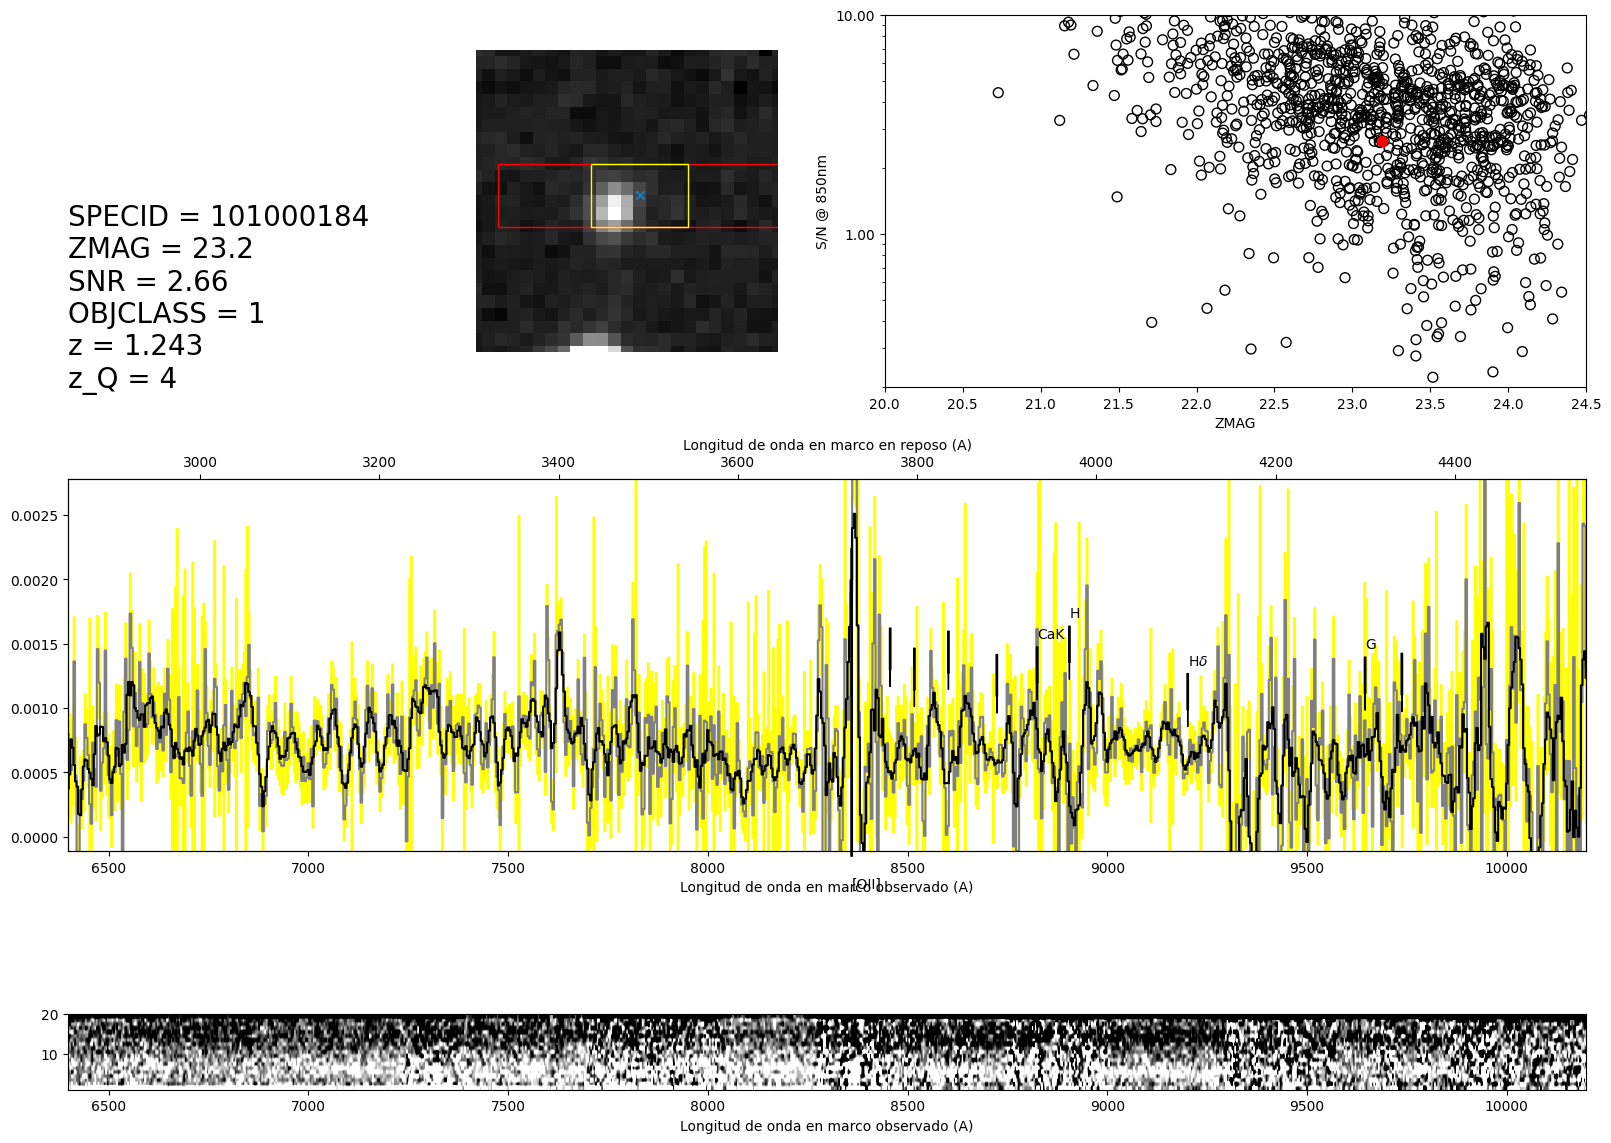

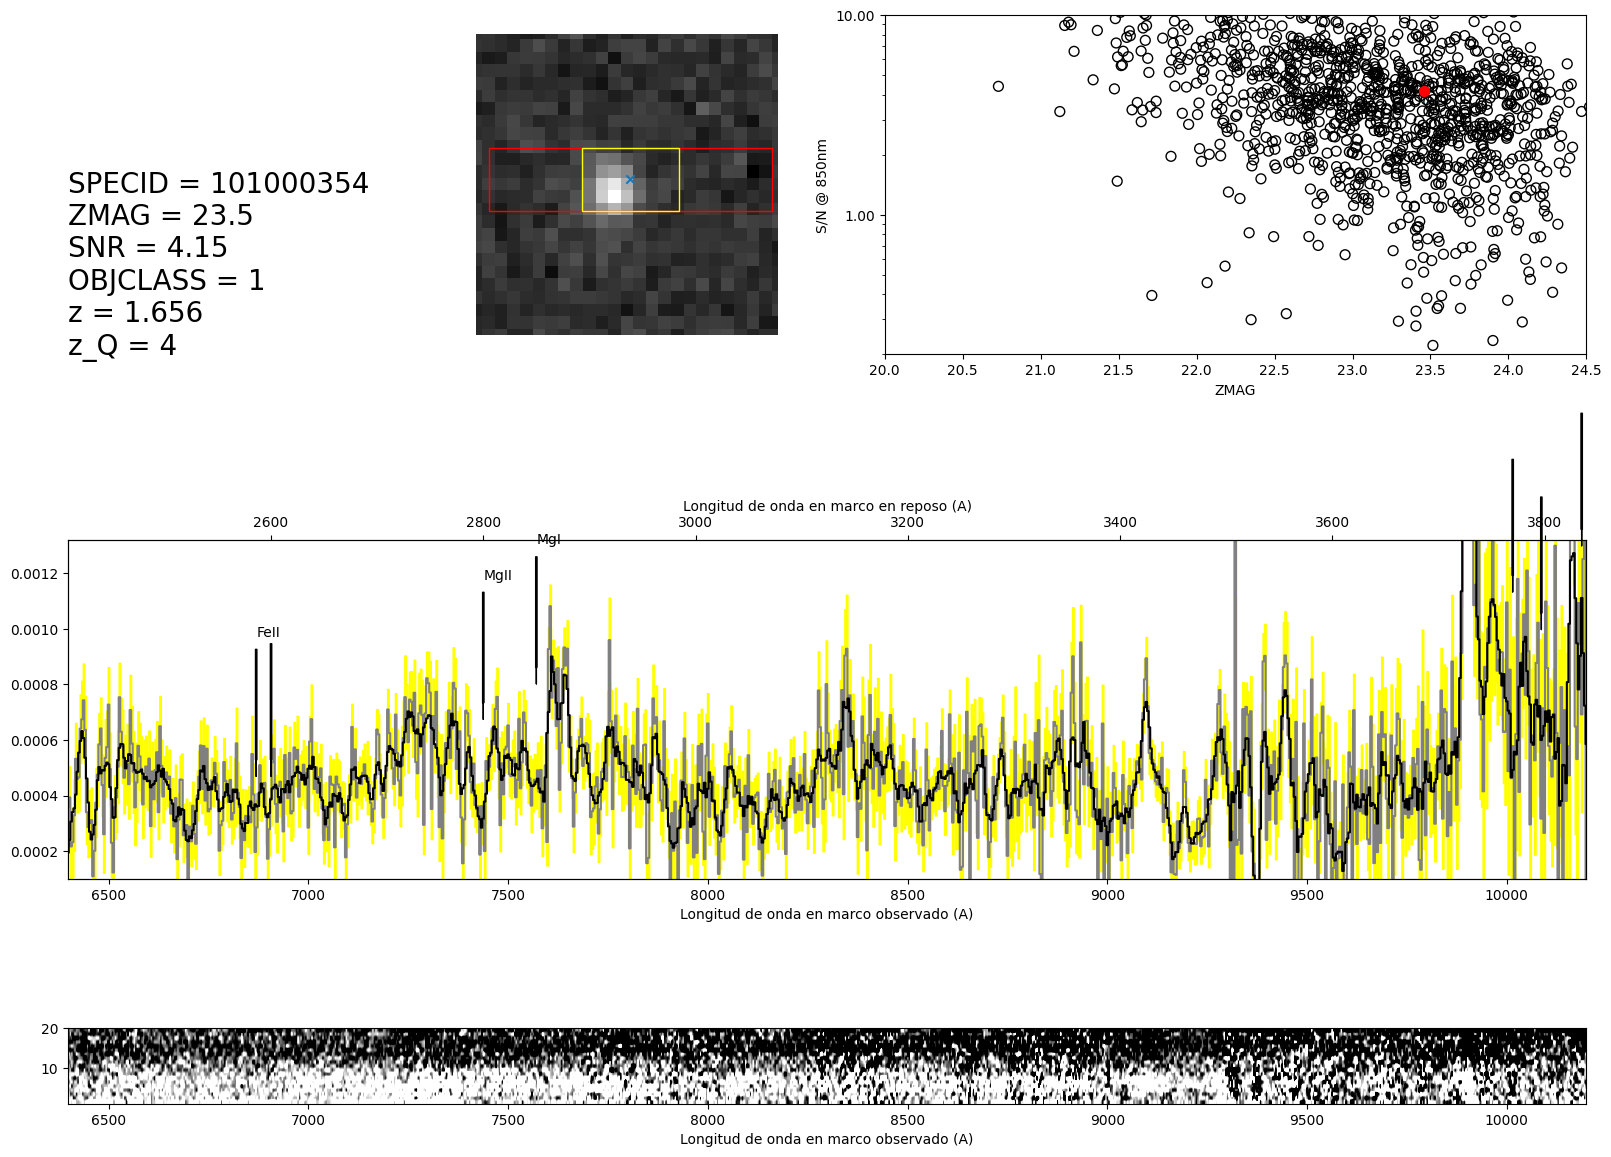

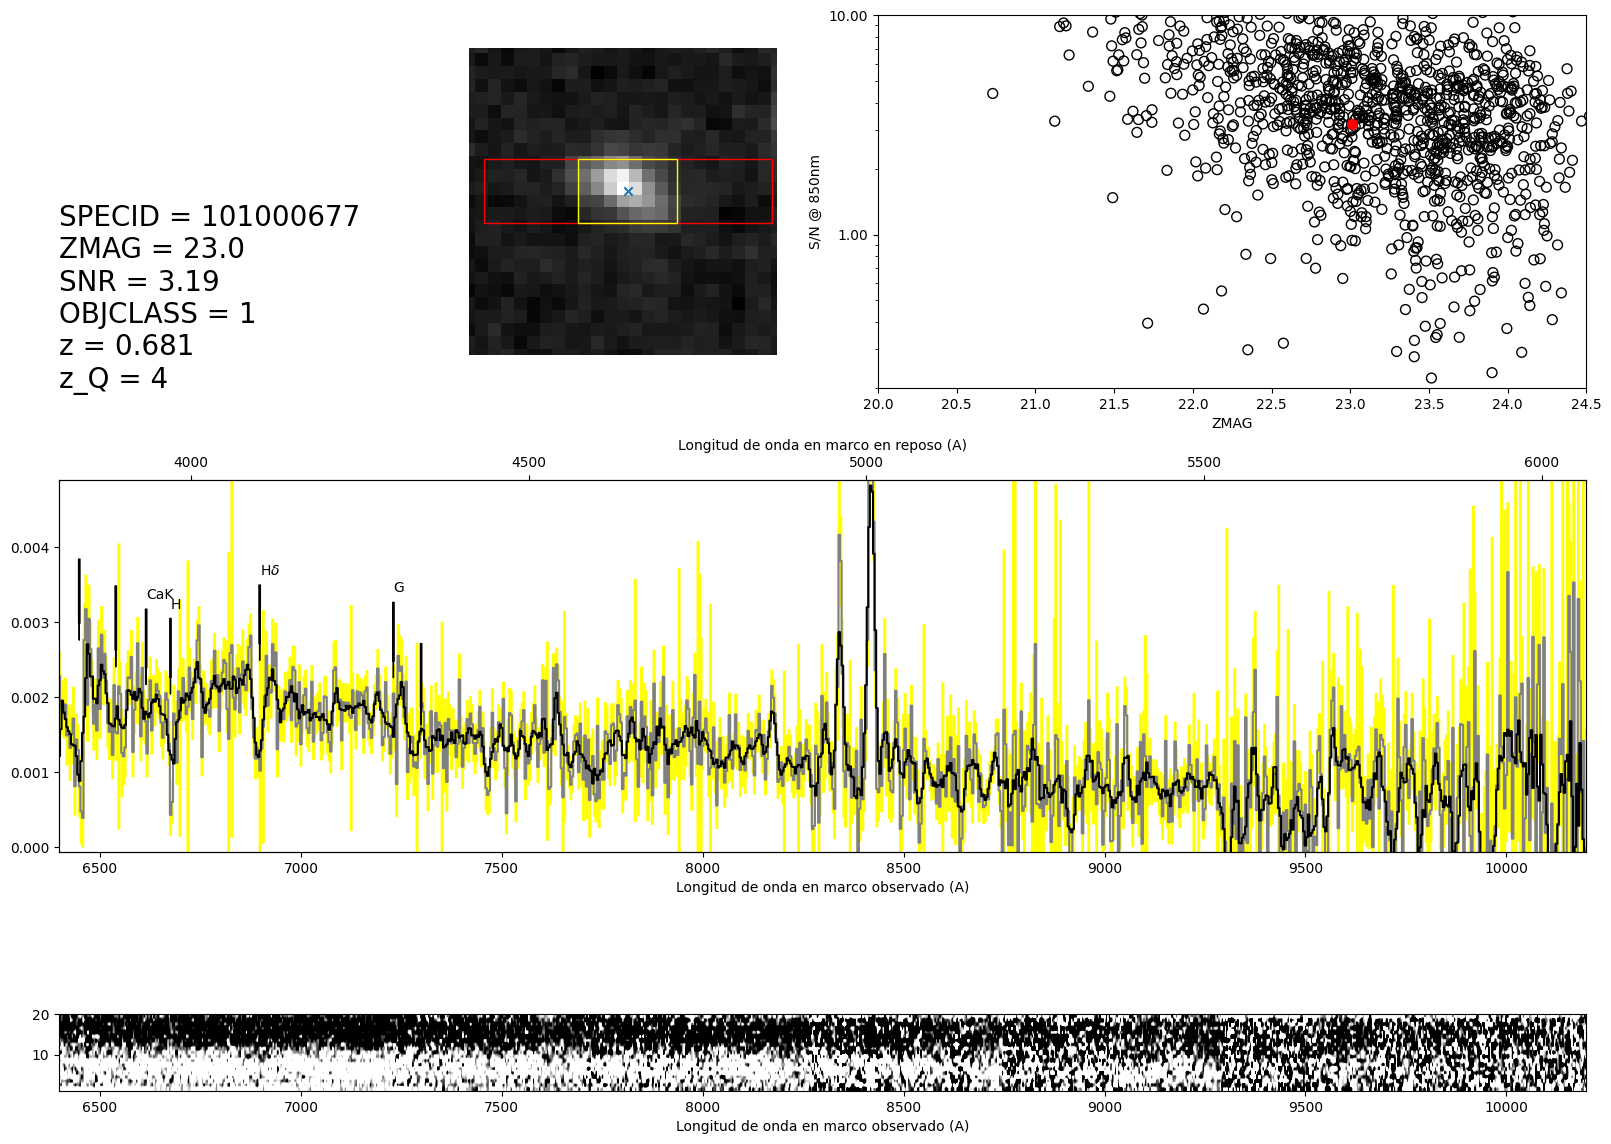

In [28]:
cluster = 'SPT0205'
image_filter='i'
zmaglim = np.array([23.5, 23.0])
zfluxlim = 10.**(-0.4*(zmaglim-25.))

#objs = matched_table.query('(SPECID=="{}")'.format(211060584))
objs = matched_table.query('(cluster=="{}") & (redshift_quality == {}) & (z_tot >= {}) & (z_tot <= {})'.format(cluster, 4,zfluxlim[0],zfluxlim[1]))

for obj_index in objs.index.values:
    print ('Generando gráfico por specid ',matched_table.loc[obj_index,'specid'])
    plotspecinspect(matched_table,obj_index,filter=image_filter)     
    #break